<h1>Project Title:</h1>
<p>Signature Verification using Machine Learning. This project demonstrates the application of statistical analysis and predictive modeling using various machine learning algorithms.</p>

<h2>Objective:</h2>
<p>Develop a machine learning model that can verify a person's signature.</p>

<h2>Data Collection:</h2>
<p>You have been provided with a dataset consisting of 80 signature images from each participant. These images will serve as the basis for training and testing your machine learning models.</p>

<h2>Data Preprocessing:</h2>
<ol>
  <li>Ensure all images are in a JPG format.</li>
  <li>Resize images to a standard size of 100x100 pixels.</li>
  <li>Crop the images to include only the signature, excluding any black frame around the signature.</li>
  <li>Convert images to grayscale to simplify the data.</li>
  <li>(Optional) Apply image processing techniques, such as edge detection or thresholding, to highlight the signature.</li>
</ol>

<h2>Feature Engineering:</h2>
<ol>
  <li>Focus on pixel-based features that can be used to detect the signature.</li>
  <li>Consider using dimensionality reduction techniques, such as PCA, to reduce the number of features while retaining the essential information.</li>
  <li>Standardize the feature values to ensure consistency.</li>
</ol>

<h2>Model Development:</h2>
<ol>
  <li>Split the dataset into training (80%) and testing (20%) sets.</li>
  <li>Apply data augmentation techniques to produce more images and increase the dataset size.</li>
  <li>You are allowed to use any machine learning models that you have learned about in class or any other algorithm that you wish to try. This includes, but is not limited to, classic machine learning algorithms such as logistic regression, decision trees, and support vector machines, as well as any other models you find suitable for signature verification.</li>
  <li>Train the model on the training set and evaluate its performance on the testing set.</li>
</ol>

<h2>Model Evaluation:</h2>
<ol>
  <li>Evaluate the model's performance using metrics such as accuracy, precision, recall, and F1 score.</li>
  <li>Analyze the results and identify areas for improvement.</li>
</ol>

<h2>Final Model Selection and Deployment:</h2>
<ol>
  <li>After evaluating all the models, choose the best model based on your criteria.</li>
  <li>Train this final model on the entire dataset.</li>
  <li>Save the trained model using the pickle package in Python.</li>
</ol>

<h2>Deliverables:</h2>
<ol>
  <li>A well-documented codebase containing the preprocessing, model development, evaluation, deployment, and testing steps.</li>
  <li>A report detailing the methodology, results, and conclusion of your project.</li>
  <li>A presentation summarizing the project and its findings.</li>
</ol>


## Project Report: Signature Classification

<p><strong>Objective:</strong><br>
The primary goal of this project is to develop a signature classification system capable of categorizing signatures into 9 distinct classes, labeled Class 1 through Class 9. Each class corresponds to a specific type of signature, with the unique signatures for each class stored in separate PDF files. In total, there are 80 different signature variants per class.</p>

<p><strong>Data Extraction and Preparation:</strong><br>
The initial task involves extracting signature images from each PDF file. These images are then sorted into nine separate folders, named Folder 1 to Folder 9, corresponding to their respective classes (Class 1 to Class 9). An important part of the data preparation process is resizing each image to a uniform dimension of 100x100 pixels to ensure consistency in input data for the model training.</p>

<p><strong>Training Process:</strong><br>
The training of the classification model will involve reading and processing the images from each designated folder. This approach ensures that the model learns the distinct features and patterns of each signature class.</p>

<p><strong>Expected Outcome:</strong><br>
Upon completion of the training, the system will be tested with unseen signature data. The effectiveness of the system will be evaluated based on its ability to accurately classify these unseen signatures into one of the nine predefined classes.</p>

## Data Preprocessing:

<p>In our signature verification project, we have employed a thorough and methodical approach to data preprocessing and augmentation, essential for the model's accuracy and reliability. Here's an elaboration of our process, suitable for inclusion in a project report:</p>

<h3>Initial Dataset and Automated Cropping:</h3>
<ul>
  <li>We were initially provided with approximately 640 signature images. We developed an automated process to extract and crop signature images directly from PDF files. This automation was crucial in efficiently processing a large volume of documents, ensuring that only the signature area was included in each image.</li>
  <li>We increased the dataset to 6,700 signature images by applying augmentation techniques and later expanded it to a  17,000 images to create a more robust and diverse training set.</li>
</ul>

<h3>Standardization and Preprocessing of Images:</h3>
<ul>
  <li>All images were converted to the JPG format for consistency.</li>
  <li>We resized each image to a uniform size of 100x100 pixels, which is essential for standardized input to the model.</li>
  <li>The images were then converted to grayscale, focusing the model's learning on structural features and reducing computational complexity.</li>
  <li>To highlight the signatures, we enhanced the contrast between the signature using the CONTOUR method.</li>
</ul>

<h3>Data Augmentation for an Expanded Dataset:</h3>
<ul>
  <li>To augment our dataset and introduce more variability, we applied several image manipulation techniques:</li>
  <li>Rotating the images by various degrees: 10, 15, 20, 25, 30, 90, 270. This rotation introduces various orientations, simulating different signing positions and styles.</li>
  <li>Adjusting the brightness of the images, which helps the model learn from signatures under different lighting conditions.</li>
  <li>Flipping the images horizontally and vertically, further diversifying the dataset by mirroring the signatures.</li>
  <li>Applying a zoom-in feature on signatures to create close-up views, enabling the model to recognize finer details.</li>
</ul>

<p>These steps not only enhanced the quality and uniformity of our dataset but also significantly increased its size and diversity. By meticulously preparing and augmenting the data, we established a robust foundation for training our signature verification model, thereby improving its ability to accurately authenticate signatures in a wide range of real-world conditions.</p>


#### Automation: Cropping from PDF

In [ ]:
import fitz  # PyMuPDF
from PIL import Image, ImageOps, ImageFilter
import os

# PDF file path. Below is the example for 1 directory. Need to change for rest of the directory.
pdf_file = 'Images/1/1.pdf' ## YOUR_PDF_FILE_LOCATION

dpi = 300  # Increased the dpi 


square_coordinates_cm = [
    (2.5, 3, 8, 7),
    (11.5, 3, 18, 7),
    (2.5, 8.5, 8, 13),
    (11.5, 8.5, 18, 13),
    (2.5, 14.5, 8, 19.2),
    (11.5, 14.5, 18, 19.2),
    (2.5, 20.5, 8, 25),
    (11.5, 20.5, 18, 25)
]


pdf_document = fitz.open(pdf_file)


pdf_folder = os.path.dirname(pdf_file)


output_folder = os.path.join(pdf_folder, "extracted_images_clear")
os.makedirs(output_folder, exist_ok=True)


for page_number, page in enumerate(pdf_document):
    
    for i, (x1_cm, y1_cm, x2_cm, y2_cm) in enumerate(square_coordinates_cm):
        
        x1_pixels = int(x1_cm * dpi / 10.58)
        y1_pixels = int(y1_cm * dpi / 10.58)
        x2_pixels = int(x2_cm * dpi / 10.58)
        y2_pixels = int(y2_cm * dpi / 10.58)

        
        img = page.get_pixmap(matrix=fitz.Matrix(1, 1), clip=(x1_pixels, y1_pixels, x2_pixels, y2_pixels))

        
        pil_image = Image.frombytes("RGB", [img.width, img.height], img.samples)

        
        pil_image = pil_image.resize((100, 100))

        # This converts the image to grayscale
        pil_image = ImageOps.grayscale(pil_image)

        # Image processing techniques thresholding to highlight the signature
        pil_image = pil_image.filter(ImageFilter.CONTOUR)

        
        image_filename = os.path.join(output_folder, f"page_{page_number + 1}_square_{i}.jpg")
        pil_image.save(image_filename, "JPEG")


pdf_document.close()

### Data augmentation techniques to produce more images and increase the dataset size

1. The augmentations include rotating the images by 10, 15, 20, 25, 30, 90, 180, and 270 degrees

2. Adjusting the brightness
3. Flipping the images horizontally and vertically.

4. Zoom In

In [ ]:
import os
from PIL import Image, ImageOps

image_directory = './Images/1/extracted_images_clear/'
output_directory = './Train/1/'
os.makedirs(output_directory, exist_ok=True)

rotation_degrees = [10, 15, 20, 25, 30]

image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.jpg', '.jpeg'))]
print(f"Processing {len(image_files)} files from {image_directory}")

for image_file in image_files:
    with Image.open(os.path.join(image_directory, image_file)) as img:
        file_name, file_ext = os.path.splitext(image_file)

        for degrees in rotation_degrees:
            rotated = img.rotate(degrees, expand=True, fillcolor='white')
            h_flipped = rotated.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
            v_flipped = rotated.transpose(Image.Transpose.FLIP_TOP_BOTTOM)

            rotated.save(os.path.join(output_directory, f'rotated_{degrees}_{file_name}_new.jpg'), 'JPEG')
            h_flipped.save(os.path.join(output_directory, f'rotated_{degrees}_hflip_{file_name}_new.jpg'), 'JPEG')
            v_flipped.save(os.path.join(output_directory, f'rotated_{degrees}_vflip_{file_name}_new.jpg'), 'JPEG')

            print(f"Saved augmented images for {image_file}")

print("Image augmentation completed.")

#### Augmentation- Rotation

In [190]:
import os
import shutil
from PIL import Image, ImageOps

image_directory = 'Images/1/extracted_images_clear/'
output_directory = 'Images/1/Augmented'
train_directory = 'Train/9'
os.makedirs(output_directory, exist_ok=True)
os.makedirs(train_directory, exist_ok=True)

rotation_degrees = [10, 15, 20, 25, 30,90,180,270]
target_size = (100, 100)

# Check and resize images if they are not 100x100
resized_count = 0
image_files = os.listdir(image_directory)

for image_file in image_files:
    if image_file.lower().endswith(('.jpg', '.jpeg')):
        with Image.open(os.path.join(image_directory, image_file)) as img:
            if img.size != target_size:
                img = img.resize(target_size, Image.ANTIALIAS)
                img.save(os.path.join(image_directory, image_file), 'JPEG')
                resized_count += 1

print(f"Resized {resized_count} images to 100x100 pixels.")

# Process the images
for image_file in image_files:
    if image_file.lower().endswith(('.jpg', '.jpeg')):
        with Image.open(os.path.join(image_directory, image_file)) as img:
            file_name, file_ext = os.path.splitext(image_file)
            file_name = file_name.lower()  # Convert filename to lowercase for consistency

            for degrees in rotation_degrees:
                rotated = img.rotate(degrees, expand=True, fillcolor='white')
                rotated.save(os.path.join(output_directory, f'rotated_{degrees}_{file_name}_new.jpg'), 'JPEG')

                h_flipped = rotated.transpose(Image.Transpose.FLIP_LEFT_RIGHT)
                h_flipped.save(os.path.join(output_directory, f'rotated_{degrees}_hflip_{file_name}_new.jpg'), 'JPEG')

                v_flipped = rotated.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
                v_flipped.save(os.path.join(output_directory, f'rotated_{degrees}_vflip_{file_name}_new.jpg'), 'JPEG')

print("Image augmentation completed. Copying files to Train/1 directory.")

# Copy files from output_directory to train_directory
for file in os.listdir(output_directory):
    shutil.copy(os.path.join(output_directory, file), os.path.join(train_directory, file))

print("Files copied to Train/1 directory.")


<ipython-input-190-49a1a1946731>:22: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  img = img.resize(target_size, Image.ANTIALIAS)


Resized 11 images to 100x100 pixels.
Image augmentation completed. Copying files to Train/1 directory.
Files copied to Train/1 directory.


#### Augmentation- Zoom in

In [2]:
import os
from PIL import Image

image_directory = './Test'
output_directory = './out'
os.makedirs(output_directory, exist_ok=True)

zoom_factor = 4 #  zoomed in by 40%.
target_size = (100, 100)

# Updated to include uppercase extensions
image_files = [f for f in os.listdir(image_directory) if f.lower().endswith(('.jpg', '.jpeg'))]
# print(f"Found {len(image_files)} image files.")

for image_file in image_files:
    with Image.open(os.path.join(image_directory, image_file)) as img:
        width, height = img.size
        new_width = width / zoom_factor
        new_height = height / zoom_factor
        left = (width - new_width) / 2
        top = (height - new_height) / 2
        right = (width + new_width) / 2
        bottom = (height + new_height) / 2

        cropped_img = img.crop((left, top, right, bottom))
        zoomed_img = cropped_img.resize((width, height), Image.ANTIALIAS)
        final_img = zoomed_img.resize(target_size, Image.ANTIALIAS)

        output_path = os.path.join(output_directory, f'zoomed_100x100_{image_file}')
        final_img.save(output_path, 'JPEG')
#         print(f"Saved: {output_path}")

print("Zoom-in augmentation and resizing to 100x100 pixels completed.")


Zoom-in augmentation and resizing to 100x100 pixels completed.


<ipython-input-2-1e557b2a7cad>:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  zoomed_img = cropped_img.resize((width, height), Image.ANTIALIAS)
<ipython-input-2-1e557b2a7cad>:27: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  final_img = zoomed_img.resize(target_size, Image.ANTIALIAS)


## Feature Engineering:
<p>We implemented a systematic approach to dimensionality reduction and feature scaling as part of the preprocessing steps for a signature verification model.</p>
<ol>
    <li><strong>PCA for Dimensionality Reduction:</strong> To address the challenge of having 10,000 features for a 100x100-pixel image, we must consider dimensionality reduction techniques. We started by applying Principal Component Analysis (PCA) to reduce the high-dimensional data into a more manageable form while retaining most of the variance in the data. We experimented with retaining different levels of variance 95%, 85%, 80%, and 70% and determined that retaining 80% of the variance with PCA offered a good balance between reducing dimensionality and preserving information necessary for accurate model performance.</li>
    <li><strong>Truncated SVD:</strong> After comparing PCA with Truncated Singular Value Decomposition (SVD), We opted for Truncated SVD to reduce the feature space to 400 features. Truncated SVD is similar to PCA but is more suitable for sparse datasets, often found in text data or image pixels. Unlike PCA, it does not center the data before computing the singular value decomposition, which makes it more efficient in terms of computation, especially with large datasets. We decided to use Truncated SVD because of its faster processing speed, which would be beneficial in the operational phase of the project.</li>
    <li><strong>Feature Scaling with StandardScaler:</strong> We then used StandardScaler to standardize the features of our dataset. StandardScaler transforms each feature to have a mean of zero and a standard deviation of one. By standardizing the features, We ensure that each feature contributes equally to the distance computations, which can improve the performance of these algorithms.</li>
    <li><strong>Saving Transformation Objects:</strong> Finally, we saved the trained Truncated SVD and StandardScaler objects as 'tsvd.pkl' and 'scaler.pkl', respectively. This step is crucial because We need to apply the same transformations to new data during the inference phase to maintain consistency. By saving the trained objects, We ensure that new data is scaled and reduced in dimensionality in the exact same way as the training data, which is necessary for the model to make accurate predictions on new signatures.</li>
</ol>


### PCA

In [ ]:
import os
import numpy as np
from PIL import Image
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import time

# Start the timer
start_time = time.time()

# Function to load and process images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        with Image.open(img_path) as img:
            img = img.convert('L')  # Convert to grayscale
            img = img.resize((100, 100))  # Resize to 100x100
            images.append(np.array(img).flatten())  # Flatten the image
    return images

# Specify the data directory
data_dir = './Train/'

# Load images and labels
class_images = {}  # Dictionary to store images for each class
for i in range(1, 10):  # Classes 1 to 9
    folder_name = os.path.join(data_dir, str(i))
    class_images[i] = load_images_from_folder(folder_name)

# Combine images into a single array and create labels
all_images = []
labels = []
for class_id, images in class_images.items():
    all_images.extend(images)
    labels.extend([class_id] * len(images))

X = np.array(all_images)
y = np.array(labels)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the StandardScaler object
with open('scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.80) 
X_pca = pca.fit_transform(X_scaled)

# Save the PCA object
with open('pca80.pkl', 'wb') as file:
    pickle.dump(pca, file)

# End the timer
end_time = time.time()

# Calculate and print the total time taken
total_time = end_time - start_time
print(f"Total time taken: {total_time} seconds")

# X_pca and y are ready for training the model

###  Truncated SVD

In [98]:
import os
import numpy as np
from PIL import Image
import pickle
from sklearn.decomposition import TruncatedSVD  # Import TruncatedSVD
from sklearn.preprocessing import StandardScaler
import time

# Start the timer
start_time = time.time()

# Function to load and process images from a folder
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        with Image.open(img_path) as img:
            img = img.convert('L')  # Convert to grayscale
            img = img.resize((100, 100))  # Resize to 100x100
            images.append(np.array(img).flatten())  # Flatten the image
    return images

# Specify the data directory
data_dir = './Train/'

# Load images and labels
class_images = {}  # Dictionary to store images for each class
for i in range(1, 10):  # Classes 1 to 9
    folder_name = os.path.join(data_dir, str(i))
    class_images[i] = load_images_from_folder(folder_name)

# Combine images into a single array and create labels
all_images = []
labels = []
for class_id, images in class_images.items():
    all_images.extend(images)
    labels.extend([class_id] * len(images))

X = np.array(all_images)
y = np.array(labels)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Save the StandardScaler object
with open('scaler_truncate.pkl', 'wb') as file:
    pickle.dump(scaler, file)

# Apply Truncated SVD to reduce dimensionality
n_components = 400  # Adjust the number of components based on your requirements
tsvd = TruncatedSVD(n_components=n_components)  # Create TruncatedSVD object
X_pca = tsvd.fit_transform(X_scaled)  # Fit and transform with TruncatedSVD

# Save the TruncatedSVD object
with open('tsvd.pkl', 'wb') as file:
    pickle.dump(tsvd, file)

# End the timer
end_time = time.time()

# Calculate and print the total time taken
total_time = end_time - start_time
print(f"Total time taken: {total_time} seconds")

# X_pca and y are ready for training the model


Total time taken: 107.30074739456177 seconds


##### Check the number of features before applying 80% PCA and TruncatedSVD

In [2]:
# X_scaled is our data after standardization and before PCA
num_features_before_pca = X_scaled.shape[1]

# X_pca is our data after applying PCA
num_features_after_pca = X_pca.shape[1]

print("Number of features before PCA:", num_features_before_pca)
print("Number of features after PCA:", num_features_after_pca)

Number of features before PCA: 10000
Number of features after PCA: 705


In [58]:
# X_scaled is our data after standardization and before TruncatedSVD
num_features_before_pca = X_scaled.shape[1]

# X_pca is our data after applying PCA
num_features_after_pca = X_pca.shape[1]

print("Number of features before TruncatedSVD:", num_features_before_pca)
print("Number of features after TruncatedSVD:", num_features_after_pca)

Number of features before TruncatedSVD: 10000
Number of features after TruncatedSVD: 400


### Model Development:
<p>In our signature verification project, <strong>precision</strong> is a critical metric because it indicates the reliability of the model in correctly identifying authentic signatures. <strong>High precision</strong> means that when the model predicts a signature as authentic, it is likely to be correct. This is crucial in scenarios where the consequences of false positives — incorrectly identifying a forgery as genuine — can be severe, such as in legal documents.</p>

<p>However, relying solely on <strong>precision</strong> might result in a model that is overly cautious, potentially leading to many false negatives, where genuine signatures are incorrectly marked as forgeries. To address this, we also consider the F1 score, which balances <strong>precision</strong> with recall — the model's ability to identify all genuine signatures. The F1 score ensures that while we maintain <strong>high precision</strong>, we do not do so at the expense of failing to detect a substantial number of authentic signatures.</p>

<p>The dataset was initially partitioned into an 80% training set and a 20% testing set, and all the model we use 'stratify=y' ensures that our training and testing datasets are representative of the overall distribution of the data. We utilized a sample size of 6,700 signatures for all the models evaluation. Upon identifying the most promising models, we expanded the dataset to 17,000 signatures, enabling us to conduct a focused validation on the best performing models. Starting with a <strong>Logistic regression model</strong> optimized with <strong>GridSearchCV</strong>. We progressed through various models, including <strong>SVM</strong> with <strong>Random</strong> and <strong>Grid search</strong> methods and <strong>a refined Grid search</strong>. We explored <strong>Decision trees</strong>, pinpointing the best hyperparameters to enhance model performance.</p>

<p>
After delving into ensemble methods, we applied boosting algorithms like <strong>XGBoost</strong> and <strong>CatBoost</strong>, alongside <strong>Bagging techniques</strong>, to harness the strengths of various learning algorithms. Among all the models evaluated, <strong>XGBoost</strong> and <strong>CatBoost</strong> stood out, with precision rates of <strong>89%</strong> and <strong>90%</strong> respectively. Ultimately, <strong>CatBoost</strong>, with its slightly superior precision, was selected as the best-performing model for our signature verification project.
</p>


<p>To ensure that our model was robust and not just memorizing the training data, we closely examined the learning curves for signs of overfitting. This vigilance allowed us to make informed adjustments to our models, ensuring they generalize well to new, unseen data.</p>

<p>In the following sections, each of these methods is detailed comprehensively, providing insight into our strategic modeling choices and the rationale behind our focus on <strong>precision</strong> and the F1 score.</p>


### <u>Logistic Regression</u>

<p>Logistic regression was initially performed with Principal Component Analysis (PCA) retaining 95% of the variance to preserve most of the data's characteristics. However, as we iterated to optimize the model, we experimented with reducing the PCA to 80% to assess the impact on performance and computational efficiency. We halted further adjustments once the total number of iterations reached its limit.</p>

<p><strong>Part 1: Coarse Grid Search</strong><br>
<strong>Objective:</strong> The aim of the coarse grid search is to explore a broad range of hyperparameters to quickly identify promising regions within the hyperparameter space. This step is not about finding the best hyperparameters but rather about narrowing down the possibilities for a more detailed search.<br>
<strong>Process:</strong>
<ul>
  <li>Define a wide range of hyperparameter values (coarse grid).</li>
  <li>Perform a grid search over this range using cross-validation.</li>
  <li>Identify the best-performing hyperparameters within this coarse grid.</li>
</ul>
<strong>Output:</strong>
<ul>
  <li>Best parameters from this broader search.</li>
  <li>A general idea of which hyperparameters and their ranges are promising.</li>
</ul>
</p>

<p><strong>Part 2: Fine Grid Search</strong><br>
<strong>Objective:</strong> Based on the results of the coarse grid search, the fine grid search aims to fine-tune the hyperparameters by exploring a more narrow and specific range around the best values found in Part 1.<br>
<strong>Process:</strong>
<ul>
  <li>Adjust the hyperparameter grid based on the results of Part 1, focusing on a narrower range around the best values found.</li>
  <li>Perform another grid search over this refined grid using cross-validation.</li>
  <li>Identify the best-performing hyperparameters within this fine grid.</li>
</ul>
<strong>Output:</strong>
<ul>
  <li>More precisely tuned hyperparameters.</li>
  <li>A higher level of confidence in the chosen hyperparameters' effectiveness.</li>
</ul>
</p>

<p><strong>Part 3: Model Training and Evaluation</strong><br>
<strong>Objective:</strong> With the best hyperparameters identified from Part 2, the final step is to train the logistic regression model using these parameters and evaluate its performance on a separate test dataset.<br>
<strong>Process:</strong>
<ul>
  <li>Train the logistic regression model using the best hyperparameters identified in Part 2.</li>
  <li>Evaluate the model's performance on the test set using metrics such as accuracy, precision, recall, and F1-score.</li>
</ul>
<strong>Output:</strong>
<ul>
  <li>A trained and tuned logistic regression model.</li>
  <li>Performance metrics that give insights into how well the model is likely to perform on unseen data.</li>
</ul>
</p>

<p><strong>Hyper Parameters used in this model</strong><br>
    
<strong>LogisticRegression(max_iter=2000):</strong> This parameter sets the maximum number of iterations for the logistic regression algorithm to converge.<br>
    
<strong>cv=3:</strong> This parameter determines the number of cross-validation folds. In this case, it's set to 3-fold cross-validation, meaning the dataset will be divided into 3 subsets, and the grid search will be performed three times, each time using a different subset as the validation set and the others as the training set.<br>
    
<strong>'C': np.logspace(-3, 3, 5):</strong> 'C' represents the regularization parameter in logistic regression. np.logspace(-3, 3, 5) generates a range of values for 'C' that spans from 0.001 to 1000, which are evenly spaced on a logarithmic scale. Regularization is a technique used to prevent overfitting in machine learning models. A smaller 'C' value imposes stronger regularization, and a larger 'C' value reduces the impact of regularization. By searching a broad range of 'C' values, you are exploring different levels of regularization to find the one that best suits your problem. The grid search will identify the optimal 'C' value that results in the best model performance during cross-validation.<br>
    
<strong>'multi_class': ['multinomial']:</strong> 'multi_class' specifies the type of multi-class classification to perform.<br>
    
<strong>'solver': ['lbfgs']:</strong> 'solver' specifies the optimization algorithm used to fit the logistic regression model. 'lbfgs' stands for Limited-memory Broyden–Fletcher–Goldfarb–Shanno, which is an optimization algorithm designed for smooth and multivariate functions. It is a popular choice for training logistic regression models for multi-class classification problems when the The LBFGS solver is efficient and well-suited for optimizing the logistic regression loss function.
</p>

#### Part 1: Coarse Grid Search

In [6]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np

import time
start_time = time.time()

# Split the dataset into training (80%) and testing (20%) sets.
# stratify=y ensures that the split is done in a way that the proportion of classes in both training and testing sets is similar
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# Coarse grid search

# The 'C' parameter in logistic regression controls the strength of the regularization. 
# It is the inverse of regularization strength, meaning a smaller value of 'C' specifies stronger regularization (more penalty)
# and a larger value of 'C' specifies weaker regularization (less penalty).

# np.logspace(-3, 3,5): This function creates logarithmically spaced numbers between 10^start and 10^stop. 
# Here, it generates numbers between 10^-3 (0.001) and 10^3 (1000).
# np.logspace(-3, 3, 5) will produce 5 numbers logarithmically spaced between 0.001 and 1000.

# multinomial: Our dataset has 9 different classes. Logistic regression is naturally a binary classifier, 
# but setting multi_class to 'multinomial' adapts it for multi-class classification problems.

# The 'lbfgs' solver in logistic regression is an optimization algorithm used to find the parameters (weights) of the model that minimize the cost function
# We choose 'lbfgs' as our dataset is midsize and L2 regularization is commonly employed with lbfgs.
# L2 regularization is a good for our signature recognition model, 
# considering the high number of features. 
# It will help in controlling model complexity and managing overfitting without eliminating potentially useful information spread across the features.

coarse_param_grid = {
    'C': np.logspace(-3, 3, 5),  # Broad range for C
    'multi_class': ['multinomial'],
    'solver': ['lbfgs'] 
}

# max_iter=2000 as our feature is large 1771
coarse_grid_search = GridSearchCV(LogisticRegression(max_iter=2000), coarse_param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=1)
coarse_grid_search.fit(X_train, y_train)
 
# Print the best parameters and score from the coarse grid search
print("Coarse Grid Search Best Parameters:", coarse_grid_search.best_params_)
print("Coarse Grid Search Best Score:", coarse_grid_search.best_score_)


# End the timer
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to run the coe: {total_time} seconds")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Coarse Grid Search Best Parameters: {'C': 0.03162277660168379, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Coarse Grid Search Best Score: 0.5532552066303064
Total time taken to run the coe: 376.6345109939575 seconds


<p><strong>Output Analysis</strong></p>
<ul>
    <li><strong>Best Parameters:</strong>
        <ul>
            <li><code>'C': 0.03162277660168379, 'multi_class': 'multinomial', 'solver': 'lbfgs'</code>: This indicates that the best performance was achieved when the regularization strength 'C' was approximately 0.0316</li>
            <li>In Part 2, the fine grid search, we will focus on a narrower range of values around 'C': 0.03162277660168379. The goal is to find a more precise 'C' value that might offer even better performance.</li>
        </ul>
    </li>
    <li><strong>Best Score:</strong>
        <ul>
            <li><code>0.5532552066303064</code>: This is the highest accuracy score achieved during the coarse grid search. It signifies that, on average, the model was about 55.3% accurate in predicting the correct class on the training data using the best parameters found.</li>
        </ul>
    </li>
</ul>

#### Part 2: Fine Grid Search

In [8]:
# Fine grid search based on results of coarse grid search
# Adjust the range/values based on the output of the coarse grid search

start_time = time.time()
fine_param_grid = {
    # Narrower range for 'C' around the best value found in the coarse search
    'C': np.linspace(0.01, 0.05, 5),  # Adjust this range as needed
    'multi_class': ['multinomial'],
    'solver': ['lbfgs']  # Keeping the solver consistent
}

fine_grid_search = GridSearchCV(LogisticRegression(max_iter=2000), fine_param_grid, cv=3, scoring='accuracy', verbose=1, n_jobs=1)
fine_grid_search.fit(X_train, y_train)

print("Fine Grid Search Best Parameters:", fine_grid_search.best_params_)
print("Fine Grid Search Best Score:", fine_grid_search.best_score_)


# End the timer
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to run the coe: {total_time} seconds")

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Fine Grid Search Best Parameters: {'C': 0.01, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
Fine Grid Search Best Score: 0.5558960519565826
Total time taken to run the coe: 340.2522437572479 seconds


<p><strong>Output Analysis</strong></p>
<ul>
    <li><strong>Best Parameters:</strong>
        <ul>
            <li><code>'C': 0.01, 'multi_class': 'multinomial', 'solver': 'lbfgs'</code>: The fine grid search determined that the best performance is achieved when the regularization strength 'C' is set to 0.01. This is a lower value compared to what was found in the coarse grid search, indicating stronger regularization. These parameters are now used to instantiate the logistic regression model in Part 3. This ensures that the model is configured with the most optimal settings as determined by the fine-tuning process.</li>
        </ul>
    </li>
</ul>

#### Part 3: Model Training and Evaluation

In [49]:
start_time = time.time()

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Follwoing line creates a new logistic regression model instance using the best parameters from the fine grid search. 
# The **best_params syntax unpacks the parameter dictionary directly into the model's constructor.
best_params = {'C': 0.01, 'multi_class': 'multinomial', 'solver': 'lbfgs'}
best_model = LogisticRegression(**best_params, max_iter=2000)
best_model.fit(X_train, y_train) # The model is trained (fitted) on the entire training dataset

# Evaluate on the test set
predictions = best_model.predict(X_test)

# Print the test accuracy and classification report
test_accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy:", test_accuracy)
print("Logistic regression Classification Report on Test data:")
print(classification_report(y_test, predictions))

# End the timer
end_time = time.time()
total_time = end_time - start_time
print(f"Total time taken to run the coe: {total_time} seconds")

Test Accuracy: 0.5915492957746479
Logistic regression Classification Report on Test data:
              precision    recall  f1-score   support

           1       0.56      0.59      0.58       144
           2       0.70      0.71      0.70        72
           3       0.59      0.63      0.61       144
           4       0.54      0.59      0.56       128
           5       0.57      0.60      0.59       144
           6       0.49      0.45      0.47       144
           7       0.68      0.61      0.64        72
           8       0.65      0.68      0.66       144
           9       0.63      0.53      0.58       144

    accuracy                           0.59      1136
   macro avg       0.60      0.60      0.60      1136
weighted avg       0.59      0.59      0.59      1136

Total time taken to run the coe: 41.03973460197449 seconds


<p><strong>Model Performance on Logistic Regression</strong></p>
<ul>
    <li><strong>Test Accuracy:</strong>
        <ul>
            <li>The model achieved an overall accuracy of approximately 59.15%. This means that out of all the test samples, about 59.15% of the time the model correctly predicted the class of the signature.</li>
        </ul>
    </li>
    <li><strong>Class-wise Performance:</strong>
        <ul>
            <li><strong>Precision (Positive Predictive Value):</strong> It indicates the proportion of positive identifications (in this case, correctly identified signatures for each class) that were actually correct. For example, This means that when the model predicts a signature to be of Class 2, it is correct 70% of the time. In the context of signature classification, precision indicates how well the model identifies actual signatures among the predicted positive cases. High precision means that when the model predicts a signature, it is likely to be correct, which is crucial for applications like fraud detection or document verification.</li>
            <li><strong>Recall (True Positive Rate):</strong> This measures the proportion of actual positives (true signatures of each class) that were identified correctly. For example, when there are actual Class 2 signatures in the documents, the model successfully detects and classifies them correctly as Class 2 about 71% of the time.</li>
            <li><strong>F1-Score:</strong> This is the harmonic mean of precision and recall, providing a single score that balances both the concerns of precision and recall. Higher F1-scores are generally better.</li>
            <li><strong>Support:</strong> This indicates the number of actual occurrences of the class in the specified dataset. For example, Class 1 had 144 instances in our test set.</li>
        </ul>
    </li>
    <li><strong>Macro and Weighted Averages:</strong>
        <ul>
            <li><strong>Macro Average:</strong> This calculates the metric independently for each class and then takes the average (treating all classes equally, regardless of how many samples are in each class.). The macro average for precision, recall, and F1-score is around 0.60, indicating average performance across all classes without considering the frequency of each class.</li>
            <li><strong>Weighted Average:</strong> This accounts for class imbalance by weighting the average of each class by the number of true instances. The weighted average for precision, recall, and F1-score is also around 0.59, similar to the overall accuracy, reflecting the performance across all classes considering their frequency.</li>
        </ul>
    </li>
    <li><strong>Overall Model Performance:</strong> The accuracy of 59.15% suggests moderate performance. It indicates the model's general ability to correctly classify signatures into their respective classes.</li>
    <li><strong>Individual Class Performance:</strong> The varying scores across different classes suggest that the model performs differently for each class. For instance, it seems more effective in predicting Classes 2, 7, and 8 compared to others like Class 6.</li>
</ul>
<p><strong>Conclusion</strong><br>
The logistic regression model doesn't show decent level of effectiveness in classifying signatures into 9 different classes with certain variability in performance across classes. This analysis should guide further efforts to improve classification accuracy, especially for classes where the model currently underperforms.</p>

### <u>Support Vector Machine (SVM)</u>

<p><strong>SVM</strong> is a powerful supervised machine learning algorithm used for both classification and regression tasks. It's well-suited for complex classification problems with distinct margins of separation in the data. Hyperparameter tuning is a critical aspect of building machine learning models.</li>
</ul>
<p>
   In our quest to enhance our model's efficiency, we explored into various SVM methodologies, incorporating PCA at both 95% and 80% thresholds. it's noteworthy that the PCA at 95% involved processing 1771 features, whereas at 80% PCA, the feature count was reduced to 540 features. Our initial strategy involved the application of <b>Randomized Search SVM</b>, which demonstrated an improved performance with a more streamlined structure. With PCA at 95%, we achieved an F1 score of 66%, requiring a duration of 40 minutes. In contrast, reducing PCA to 80% led to a notable increase in the F1 score, reaching 79%, and significantly decreased the runtime to just 12 minutes.
</p>
<p>
    Recognizing the potential from Randomized Search, we proceeded with <b>Grid Search SVM</b> for more precise hyperparameter tuning. Despite achieving a similar 79% F1 score, this approach had a higher computational cost.
</p>
<p>
    To refine our approach further, we conducted what we termed "<b>Refined Grid Search SVM</b>", using the best hyperparameters identified in the previous Grid Search. This was executed for both PCA settings.
</p>
<p>
    Comparing <b>Randomized Search SVM</b>, <b>Tuned Grid Search SVM</b>, and <b>Refined Grid Search SVM</b>, we found notable differences. The Grid Search SVM at 95% PCA achieved the highest F1 score of 67%. However, both PCA 80% Grid Search SVM and Randomized Search SVM achieved a 79% F1 score, with a precision of 81%.

In summary, the <b>Refined Grid Search SVM with PCA at 80%</b> showed the best performance. It achieved an F1-Score of 79% with a high average precision of 0.81 while also being computationally efficient (271 seconds). This is a notable improvement over the PCA with 95%, which had a larger feature set (1771 features compared to 540 for PCA 80%). <b>This suggests that reducing the complexity of the feature space can lead to more efficient and equally effective models.<b>
</p>
<p>
    Below is a comparison table summarizing the performances:
</p>
<table>
<thead>
<tr>
<th>PCA Setting</th>
<th>Model Description</th>
<th>Average Precision</th>
<th>Average Recall</th>
<th>Average F1-Score</th>
<th>Time Taken to Run (seconds)</th>
</tr>
</thead>
<tbody>
<tr>
<td>95%</td>
<td>Randomized Search SVM</td>
<td>0.70</td>
<td>0.65</td>
<td>0.66</td>
<td>2208</td>
</tr>
<tr>
<td>95%</td>
<td>Grid Search SVM</td>
<td>0.68</td>
<td>0.66</td>
<td>0.67</td>
<td>11402</td>
</tr>
<tr>
<td>95%</td>
<td>Refined Grid Search SVM</td>
<td>0.68</td>
<td>0.66</td>
<td>0.66</td>
<td>859</td>
</tr>
<tr>
<td>80%</td>
<td>Randomized Search SVM</td>
<td>0.79</td>
<td>0.79</td>
<td>0.79</td>
<td>571</td>
</tr>
<tr>
<td>80%</td>
<td>Grid Search SVM</td>
<td>0.81</td>
<td>0.79</td>
<td>0.79</td>
<td>2943</td>
</tr>
<tr>
<td>80%</td>
<td>Refined Grid Search SVM</td>
<td>0.81</td>
<td>0.79</td>
<td>0.79</td>
<td>271</td>
</tr>
</tbody>
</table>

### Randomized Search SVM with PCA 95%

<p>
       Here, the choices of hyperparameter parameters and their ranges are carefully crafted to ensure a thorough yet efficient exploration of
    the model's hyperparameter space, balancing the breadth of exploration with computational practicality.
    
<strong>C Parameter (Regularization Strength):</strong> 
    The 'C' parameter in SVM determines the strength of regularization. It is set to vary logarithmically, 
    using np.logspace, from \(10^{-4}\) to \(10^4\). This range is chosen to cover a wide spectrum of values, 
    from very weak to very strong regularization. By using only 10 values within this range, the complexity 
    is managed, allowing for a balanced exploration without overwhelming the model with too many variations.
</p>
<p>
    <strong>Kernel Parameter:</strong> 
    The 'kernel' parameter defines the type of hyperplane used to separate the data. Only two kernel types 
    are chosen: 'linear' and 'rbf' (Radial Basis Function). 'Linear' kernel is suitable for linearly separable 
    data, while 'rbf' is effective for non-linear separations. This selection narrows the focus to two primary 
    and distinct kernel behaviors, simplifying the tuning process.
</p>
<p>
    <strong>Gamma Parameter (Kernel Coefficient):</strong> 
    'Gamma' influences the decision boundary in kernel-based classifiers like SVM. It is set using np.logspace 
    to vary logarithmically from \(10^{-4}\) to \(10^1\). This range provides a balanced exploration from low 
    to high values, affecting how far the influence of a single training example reaches. Limiting to 10 values 
    allows for a thorough yet manageable assessment of its impact, avoiding unnecessary complexity

</p>

In [51]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import time

start_time = time.time()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# Initialize the SVM classifier
svm = SVC()

# Simplified hyperparameter space
param_dist = {
    'C': np.logspace(-4, 4, 10),  # Fewer values for regularization parameter
    'kernel': ['linear', 'rbf'],  # Reduced kernel options
    'gamma': np.logspace(-4, 1, 10)  # Fewer values for kernel coefficient
}

# Randomized search with fewer iterations and cross-validation folds
# Set the n_jobs parameter to -1 to use all available cores.
random_search = RandomizedSearchCV(svm, param_dist, n_iter=50, cv=3, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Select the best model
best_model = random_search.best_estimator_

# Evaluate the best model
predictions = best_model.predict(X_test)

# Print the test accuracy and classification report
test_accuracy = accuracy_score(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Randomized Search Classification Report on Test data:")
print(classification_report(y_test, predictions))


# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")


Fitting 3 folds for each of 50 candidates, totalling 150 fits
Test Accuracy: 0.653169014084507
Randomized Search Classification Report on Test data:
              precision    recall  f1-score   support

           1       0.72      0.61      0.66       144
           2       0.84      0.75      0.79        72
           3       0.72      0.62      0.67       144
           4       0.64      0.58      0.61       128
           5       0.80      0.68      0.73       144
           6       0.52      0.42      0.46       144
           7       0.85      0.56      0.67        72
           8       0.71      0.77      0.74       144
           9       0.48      0.89      0.62       144

    accuracy                           0.65      1136
   macro avg       0.70      0.65      0.66      1136
weighted avg       0.68      0.65      0.65      1136

Total time taken: 2208.237100839615 seconds


### Randomized Search SVM with PCA 80%

In [47]:
import numpy as np
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import time

start_time = time.time()


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# Initialize the SVM classifier
svm = SVC()

# Simplified hyperparameter space
param_dist = {
    'C': np.logspace(-4, 4, 10),  # Fewer values for regularization parameter
    'kernel': ['linear', 'rbf'],  # Reduced kernel options
    'gamma': np.logspace(-4, 1, 10)  # Fewer values for kernel coefficient
}

# Randomized search with fewer iterations and cross-validation folds
# Set the n_jobs parameter to -1 to use all available cores.
random_search = RandomizedSearchCV(svm, param_dist, n_iter=50, cv=3, scoring='accuracy', random_state=42, verbose=1, n_jobs=-1)
random_search.fit(X_train, y_train)

# Select the best model
best_model = random_search.best_estimator_

# Evaluate the best model
predictions = best_model.predict(X_test)

# Print the test accuracy and classification report
test_accuracy = accuracy_score(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Randomized Search Classification Report on Test data:")
print(classification_report(y_test, predictions))


# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Test Accuracy: 0.7825704225352113
Randomized Search Classification Report on Test data:
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       144
           1       0.81      0.89      0.85        72
           2       0.80      0.75      0.77       144
           3       0.72      0.77      0.74       128
           4       0.90      0.79      0.84       144
           5       0.68      0.59      0.63       144
           6       0.88      0.72      0.79        72
           7       0.82      0.85      0.84       144
           8       0.67      0.89      0.77       144

    accuracy                           0.78      1136
   macro avg       0.79      0.79      0.79      1136
weighted avg       0.79      0.78      0.78      1136

Total time taken: 571.133519411087 seconds


After the randomized search successfully pinpointed promising areas in the hyperparameter space, we are now in a position to utilize Grid Search SV. This method will allow for more precise and detailed adjustments within those identified regions.
### Grid Search SVM with PCA 95%

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

start_time = time.time()

# X_pca and y are already defined and preprocessed

# Initialize the SVM classifier with RBF kernel
svm = SVC(kernel='rbf')

# Define a more focused hyperparameter grid
param_grid = {
    'C': np.linspace(100, 200, 10),  # Values around 166.81
    'gamma': np.linspace(0.0001, 0.001, 10)  # Values around 0.000359
}


# Conduct grid search

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters from the grid search
print("Refined Grid Search Best Hyperparameters: ", grid_search.best_params_)


# Evaluate the best model from grid search
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Print the test accuracy and classification report
test_accuracy = accuracy_score(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Grid Search Classification Report on Test data:")
print(classification_report(y_test, predictions))

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Refined Grid Search Best Hyperparameters:  {'C': 100.0, 'gamma': 0.00019999999999999998}
Grid Search Classification Report:
              precision    recall  f1-score   support

           1       0.74      0.62      0.68       144
           2       0.81      0.75      0.78        72
           3       0.68      0.65      0.66       144
           4       0.59      0.57      0.58       128
           5       0.72      0.67      0.69       144
           6       0.52      0.47      0.49       144
           7       0.79      0.68      0.73        72
           8       0.68      0.76      0.72       144
           9       0.57      0.80      0.67       144

    accuracy                           0.66      1136
   macro avg       0.68      0.66      0.67      1136
weighted avg       0.66      0.66      0.66      1136

Total time taken: 11402.485391378403 seconds


### Grid Search SVM with PCA 80%

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

start_time = time.time()

# X_pca and y are already defined and preprocessed

# Initialize the SVM classifier with RBF kernel
svm = SVC(kernel='rbf')

# Define a more focused hyperparameter grid
param_grid = {
    'C': np.linspace(100, 200, 10),  # Values around 166.81
    'gamma': np.linspace(0.0001, 0.001, 10)  # Values around 0.000359
}


# Conduct grid search

grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters from the grid search
print("Refined Grid Search Best Hyperparameters: ", grid_search.best_params_)


# Evaluate the best model from grid search
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

# Print the test accuracy and classification report
test_accuracy = accuracy_score(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Grid Search Classification Report on Test data:")
print(classification_report(y_test, predictions))

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Refined Grid Search Best Hyperparameters:  {'C': 100.0, 'gamma': 0.0005}
Test Accuracy: 0.7878521126760564
Grid Search Classification Report on Test data:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       144
           1       0.85      0.92      0.88        72
           2       0.81      0.72      0.76       144
           3       0.76      0.78      0.77       128
           4       0.91      0.82      0.86       144
           5       0.68      0.57      0.62       144
           6       0.91      0.72      0.81        72
           7       0.85      0.88      0.86       144
           8       0.61      0.90      0.73       144

    accuracy                           0.79      1136
   macro avg       0.81      0.79      0.79      1136
weighted avg       0.80      0.79      0.79      1136

Total time taken: 2943.3644654750824 seconds


### We will do further Tuning from Grid search:

basd on best Hyperparameters that came from above grid searchSV:  {'Kernel'='rbf', 'C': 100.0, 'gamma': 0.00019999999999999998}
### Refined Grid Search SVM with PCA 95%

In [12]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

start_time = time.time()

# X_pca and y are already defined and preprocessed

# Initialize the SVM classifier with RBF kernel
svm_refined = SVC(kernel='rbf')

# Define a more focused hyperparameter grid based on previous results
param_grid_refined = {
    'C': [95, 100, 105],  # Specific values around 100
    'gamma': [0.00018, 0.0002, 0.00022]  # Specific values around gamma = 0.0002
}

# Perform a refined grid search using the training set
# Perform a refined grid search
# n_jobs=-1 means that you want to use all available cores on your machine. 
# This can significantly speed up operations that can be parallelized, 
# such as cross-validation during grid searches or random searches.

grid_search_refined = GridSearchCV(svm_refined, param_grid_refined, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_refined.fit(X_train, y_train)

# Print the best hyperparameters from the refined grid search
print("Refined Grid Search - Best Hyperparameters:", grid_search_refined.best_params_)

# Evaluate the best model from the refined grid search on the test set
best_model_refined = grid_search_refined.best_estimator_
predictions = best_model_refined.predict(X_test)

# Print the test accuracy and classification report
test_accuracy = accuracy_score(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Refined Grid Search Classification Report on Test Set:")
print(classification_report(y_test, predictions))


# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Refined Grid Search - Best Hyperparameters: {'C': 95, 'gamma': 0.00022}
Test Accuracy: 0.6558098591549296
Refined Grid Search Classification Report on Test Set:
              precision    recall  f1-score   support

           1       0.75      0.61      0.67       144
           2       0.81      0.75      0.78        72
           3       0.70      0.65      0.67       144
           4       0.58      0.56      0.57       128
           5       0.71      0.67      0.69       144
           6       0.52      0.45      0.48       144
           7       0.81      0.67      0.73        72
           8       0.68      0.76      0.72       144
           9       0.56      0.83      0.67       144

    accuracy                           0.66      1136
   macro avg       0.68      0.66      0.66      1136
weighted avg       0.66      0.66      0.65      1136

Total time taken: 859.2540204524994 seconds


### Refined Grid Search SVM with PCA 80%

In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import time

start_time = time.time()

# X_pca and y are already defined and preprocessed

# Initialize the SVM classifier with RBF kernel
svm_refined = SVC(kernel='rbf')

# Define a more focused hyperparameter grid based on previous results
param_grid_refined = {
    'C': [95, 100, 105],  # Specific values around 100
    'gamma': [0.0003, 0.0005, 0.0007]  # Specific values around gamma = 0.0002
}

# Perform a refined grid search using the training set
# Perform a refined grid search
# n_jobs=-1 means that you want to use all available cores on your machine. 
# This can significantly speed up operations that can be parallelized, 
# such as cross-validation during grid searches or random searches.

grid_search_refined = GridSearchCV(svm_refined, param_grid_refined, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_refined.fit(X_train, y_train)

# Print the best hyperparameters from the refined grid search
print("Refined Grid Search - Best Hyperparameters:", grid_search_refined.best_params_)

# Evaluate the best model from the refined grid search on the test set
best_model_refined = grid_search_refined.best_estimator_
predictions = best_model_refined.predict(X_test)

# Print the test accuracy and classification report
test_accuracy = accuracy_score(y_test, predictions)

print("Test Accuracy:", test_accuracy)
print("Refined Grid Search Classification Report on Test Set:")
print(classification_report(y_test, predictions))


# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Refined Grid Search - Best Hyperparameters: {'C': 95, 'gamma': 0.0005}
Test Accuracy: 0.7878521126760564
Refined Grid Search Classification Report on Test Set:
              precision    recall  f1-score   support

           0       0.89      0.83      0.86       144
           1       0.85      0.92      0.88        72
           2       0.81      0.72      0.76       144
           3       0.76      0.78      0.77       128
           4       0.91      0.82      0.86       144
           5       0.68      0.57      0.62       144
           6       0.91      0.72      0.81        72
           7       0.85      0.88      0.86       144
           8       0.61      0.90      0.73       144

    accuracy                           0.79      1136
   macro avg       0.81      0.79      0.79      1136
weighted avg       0.80      0.79      0.79      1136

Total time taken: 271.0175988674164 seconds


#### Comparing result among Randomized Search SVM, Tunned Grid Search SV and Refined Grid Search SVM

### Result Table when used PCA 95%

In [56]:
import pandas as pd

# Set the display width option to a larger value
pd.set_option('display.width', 1000)

# Accuracy: Average Macro  of precision, recall, and F1-score from our classification reports
# Macro averaging is useful as we want to understand the model's performance across all classes equally, 
# without giving more importance to one class over another

# Randomized Search SVM
avg_precision_random = 0.70
avg_recall_random = 0.65
avg_f1_random = 0.66

# Grid Search SVM
avg_precision_grid = 0.68
avg_recall_grid = 0.66
avg_f1_grid = 0.67

# Refined Grid Search SVM
avg_precision_refined_grid = 0.68
avg_recall_refined_grid = 0.66
avg_f1_refined_grid = 0.66

# Create a DataFrame
results_df = pd.DataFrame({
    'Model Description': ['Randomized Search SVM', 'Grid Search SVM', 'Refined Grid Search SVM'],
    'Average Precision': [avg_precision_random, avg_precision_grid, avg_precision_refined_grid],
    'Average Recall': [avg_recall_random, avg_recall_grid, avg_recall_refined_grid],
    'Average F1-Score': [avg_f1_random, avg_f1_grid, avg_f1_refined_grid]
})

# Display the DataFrame without the index
print(results_df.to_string(index=False))

      Model Description  Average Precision  Average Recall  Average F1-Score
  Randomized Search SVM               0.70            0.65              0.66
        Grid Search SVM               0.68            0.66              0.67
Refined Grid Search SVM               0.68            0.66              0.66


### Result Table when used PCA 80%

In [57]:
import pandas as pd

# Set the display width option to a larger value
pd.set_option('display.width', 1000)

# Accuracy: Average Macro  of precision, recall, and F1-score from our classification reports
# Macro averaging is useful as we want to understand the model's performance across all classes equally, 
# without giving more importance to one class over another

# Randomized Search SVM
avg_precision_random = 0.79
avg_recall_random = 0.79
avg_f1_random = 0.79

# Grid Search SVM
avg_precision_grid = 0.81
avg_recall_grid = 0.79
avg_f1_grid = 0.79

# Refined Grid Search SVM
avg_precision_refined_grid = 0.81
avg_recall_refined_grid = 0.79
avg_f1_refined_grid = 0.79

# Create a DataFrame
results_df = pd.DataFrame({
    'Model Description': ['Randomized Search SVM', 'Grid Search SVM', 'Refined Grid Search SVM'],
    'Average Precision': [avg_precision_random, avg_precision_grid, avg_precision_refined_grid],
    'Average Recall': [avg_recall_random, avg_recall_grid, avg_recall_refined_grid],
    'Average F1-Score': [avg_f1_random, avg_f1_grid, avg_f1_refined_grid]
})

# Display the DataFrame without the index
print(results_df.to_string(index=False))

      Model Description  Average Precision  Average Recall  Average F1-Score
  Randomized Search SVM               0.79            0.79              0.79
        Grid Search SVM               0.81            0.79              0.79
Refined Grid Search SVM               0.81            0.79              0.79


## <u>Decision Tree<u>
<p>
    A PCA with 95% resulted in an F1 score and precision of 56%, whereas a reduction to 80% yielded a slightly higher F1 score of 58%. This outcome suggests that a simpler structure tends to be more effective. While the 95% PCA incorporated 1771 features, reducing it to 80% utilized only 540 features. Despite the improvements with a simpler model, the overall results still did not reach a promising level.
</p>

<p>We will proceed with careful consideration in selecting the hyperparameters for the decision tree.</p>
<ol>
    <li><strong>Criterion:</strong>
        <ul>
            <li>The 'criterion' parameter determines the function used to measure the quality of a split in the decision tree.</li>
            <li>The options are 'gini' and 'entropy':</li>
            <li>'Gini' measures the frequency at which any element of the dataset will be wrongly labeled when it is randomly chosen.</li>
            <li>'Entropy' is a measure of information that indicates the disorder or uncertainty of the data.</li>
            <li>Choice between 'gini' and 'entropy' affects how decision tree nodes decide to split data.</li>
        </ul>
    </li>
    <li><strong>Max Depth:</strong>
        <ul>
            <li>The 'max_depth' parameter specifies the maximum depth of the tree.</li>
            <li>The values provided are [10, 20, 30, None]:</li>
            <li>Specific numerical values (10, 20, 30) limit the depth of the tree.</li>
            <li>A deeper tree can capture more information about the data, but risks overfitting.</li>
            <li>'None' means that nodes are expanded until all leaves are pure or until all leaves contain less than the minimum samples required to split a node.</li>
            <li>Setting 'max_depth' helps in preventing the tree from becoming overly complex and overfitting the training data.</li>
        </ul>
    </li>
    <li><strong>Min Samples Split:</strong>
        <ul>
            <li>The 'min_samples_split' parameter defines the minimum number of samples required to split an internal node.</li>
            <li>The options [2, 5, 10] represent the minimum number of samples that a node must have before it can be split:</li>
            <li>Lower values allow the tree to split even with a small number of samples, leading to potentially deeper trees.</li>
            <li>Higher values prevent the model from learning overly specific patterns, thus controlling overfitting.</li>
        </ul>
    </li>
    <li><strong>Min Samples Leaf:</strong>
        <ul>
            <li>The 'min_samples_leaf' parameter sets the minimum number of samples required to be at a leaf node.</li>
            <li>The choices [1, 2, 4] dictate the smallest size of leaves:</li>
            <li>Smaller leaf sizes allow the tree to capture more information about the data, which can be beneficial for prediction but may lead to overfitting.</li>
            <li>Larger leaf sizes increase the generalization ability of the model and help prevent overfitting.</li>
        </ul>
    </li>
</ol>

### Decision Tree with PCA 95%

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

#Split your dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

In [16]:
# Define the parameter grid for the DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [17]:
# Initialize the DecisionTreeClassifier and conduct a grid search:
import time

start_time = time.time()

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

# Print the best hyperparameters and their corresponding performance
print("Best hyperparameters found:")
print(grid_search.best_params_)
print("\nClassification Report on Test Data:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Total time taken: 1384.7651715278625 seconds
Best hyperparameters found:
{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report on Test Data:
              precision    recall  f1-score   support

           1       0.68      0.66      0.67       144
           2       0.61      0.58      0.60        72
           3       0.60      0.55      0.57       144
           4       0.45      0.48      0.46       128
           5       0.61      0.62      0.62       144
           6       0.45      0.53      0.49       144
           7       0.43      0.44      0.44        72
           8       0.69      0.62      0.65       144
           9       0.57      0.54      0.55       144

    accuracy                           0.57      1136
   macro avg       0.56      0.56      0.56      1136
weighted avg       0.57      0.57      0.57      1136



### Decision Tree with PCA 80%

In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

#Split your dataset into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)
# Define the parameter grid for the DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [60]:
# Initialize the DecisionTreeClassifier and conduct a grid search:
import time

start_time = time.time()

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator=dtree, param_grid=param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

# Print the best hyperparameters and their corresponding performance
print("Best hyperparameters found:")
print(grid_search.best_params_)
print("\nClassification Report on Test Data:")
y_pred = grid_search.predict(X_test)
print(classification_report(y_test, y_pred))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Total time taken: 1251.4177117347717 seconds
Best hyperparameters found:
{'criterion': 'gini', 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       144
           1       0.66      0.56      0.60        72
           2       0.58      0.59      0.59       144
           3       0.49      0.52      0.51       128
           4       0.59      0.62      0.60       144
           5       0.45      0.48      0.46       144
           6       0.54      0.51      0.53        72
           7       0.66      0.64      0.65       144
           8       0.56      0.59      0.58       144

    accuracy                           0.58      1136
   macro avg       0.58      0.57      0.58      1136
weighted avg       0.58      0.58      0.58      1136



<h3>Ensemble Technique XGBoost, CatBoost</h3>

<p>
    In machine learning, an "ensemble technique" refers to a method where multiple models, often called "weak learners," are combined to form a stronger predictive model. The idea is to leverage the strengths of each individual model to improve overall accuracy, reduce overfitting, or enhance the model's ability to generalize to new data. We will use <b>XGBoost (eXtreme Gradient Boosting)</b> and <b>CatBoost (Category Boosting)</b> in our next approach.
</p>

<p>
    In the scenario of signature verification involving large datasets and multiple classes, ensemble techniques like XGBoost and CatBoost provide significant advantages over simpler approaches such as single decision trees, even those optimized with grid search:
    <ul>
        <li><strong>Handling Large and Complex Data:</strong><br>
            XGBoost and CatBoost are highly efficient with large datasets, capable of effectively managing thousands to millions of data points. This makes them particularly suitable for complex datasets in signature verification.
        </li>
        <li><strong>Improved Accuracy and Robustness:</strong><br>
            As ensemble methods, XGBoost and CatBoost generally yield more accurate models than a single decision tree. They achieve this by reducing the risk of overfitting and enhancing generalization through the aggregation of multiple models' predictions.
        </li>
        <li><strong>Handling Imbalanced Classes:</strong><br>
            In scenarios with multi-class problems like signature verification, class imbalance can be a significant issue. XGBoost and CatBoost are equipped with mechanisms to effectively handle this imbalance, which is crucial for accurate classification.
        </li>
        <li><strong>Feature Importance and Selection:</strong><br>
            Both XGBoost and CatBoost excel in feature selection and understanding feature importance. This capability is critical in signature verification for pinpointing unique signature characteristics that are vital for accurate classification.
        </li>
        <li><strong>Flexibility and Scalability:</strong><br>
            These algorithms offer considerable flexibility in optimization objectives and are scalable to different data sizes and shapes. This adaptability is crucial for handling varying complexities in datasets, typical in signature verification tasks.
        </li>
        <li><strong>Handling Noise and Variability:</strong><br>
            Signature data can often be variable and noisy. Ensemble methods like XGBoost and CatBoost are better suited for such data compared to a single decision tree, as they are more adept at distinguishing signal from noise.
        </li>
        <li><strong>Speed and Efficiency:</strong><br>
            Known for their computational efficiency, XGBoost and CatBoost utilize advanced techniques like gradient boosting and support for categorical features, which accelerate the training and prediction processes.
        </li>
    </ul>
</p>

### XGBoost

<p>We will carry out a series of experiments using XGBoost with PCA, retaining 80% of the variance. We also uses Truncated SVD for dimenstion reduction to 400 features. This decision is based on our observation that reducing dimensionality simplifies models, reduces overfitting, and improves predictions. These experiments will involve a Coarse Tuning phase.</p>
<p>In Coarse Tuning, we initiate the hyperparameter optimization process with broader ranges or fewer values for each hyperparameter. This approach is designed to efficiently identify promising regions within the hyperparameter space, avoiding excessive computational costs on areas less likely to yield optimal results.</p>

<p>The insights gained from the coarse tuning phase will guide us in refining our hyperparameter search in a more focused and detailed manner, known as fine-tuning. Fine-tuning involves conducting additional iterations with narrower hyperparameter ranges, leveraging the knowledge acquired during coarse tuning to further enhance model performance. We start with folloiwng hyperparameter.</p>
<ol>
    <li>
        <strong>max_depth:</strong>
        <ul>
            <li>This parameter sets the maximum depth of each tree in the XGBoost model.</li>
            <li>Depths of 3, 5, and 7 are chosen as starting points to see how complex each tree should be. Deeper trees can capture more complex patterns but may lead to overfitting, while shallower trees may not capture enough nuances in the data.</li>
        </ul>
    </li>
    <li>
        <strong>learning_rate:</strong>
        <ul>
            <li>The learning rate is a crucial parameter in gradient boosting models like XGBoost. It determines the step size at each iteration while moving toward a minimum of a loss function.</li>
            <li>A learning rate of 0.1 or 0.3 is typical for starting. A smaller learning rate makes the model more robust to overfitting but requires more trees (n_estimators) to converge.</li>
        </ul>
    </li>
    <li>
        <strong>n_estimators:</strong>
        <ul>
            <li>This parameter specifies the number of trees in the forest of the model.</li>
            <li>Choosing 50 and 100 trees provides a balance between computational efficiency and having enough trees to capture the patterns in the data effectively.</li>
        </ul>
    </li>
    <li>
        <strong>subsample:</strong>
        <ul>
            <li>Subsample refers to the fraction of samples used for fitting each tree.</li>
            <li>A value of 0.8 means using 80% of the data for each tree, which can help prevent overfitting. A value of 1 means using all the data, which can provide more information to each tree but might increase the risk of overfitting.</li>
        </ul>
    </li>
    <li>
        <strong>colsample_bytree:</strong>
        <ul>
            <li>This parameter sets the fraction of features (columns) to be randomly sampled for each tree.</li>
            <li>Like subsample, values of 0.8 and 1 are chosen to see the effect of using a subset of features versus using all features for each tree. </li>
        </ul>
    </li>
</ol>

### XBoost with PCA 80%

In [33]:
import numpy as np
from PIL import Image
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import time

start_time = time.time()


# Adjust labels to start from 0 instead of 1
# XGBoost is expecting the class labels to start from 0 and go up to num_class - 1. Since you have class labels starting from 1 to 9, 
# We need to subtract 1 from each label to match the expected format.

y = np.array(labels) - 1  # This ensures class labels start at 0

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Stage 1: Coarse Hyperparameter Grid
coarse_param_grid = {
    'max_depth': [3, 5, 7],  # Few depths to start with
    'learning_rate': [0.1, 0.3],  # Common starting learning rates
    'n_estimators': [50, 100],  # Not too many trees
    'subsample': [0.8, 1],  # Just a couple of values for subsampling
    'colsample_bytree': [0.8, 1],  # Same for feature subsampling
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV to explore the hyperparameter space
coarse_search = RandomizedSearchCV(xgb_clf, param_distributions=coarse_param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   n_jobs=-1, random_state=42, verbose=1)

coarse_search.fit(X_train, y_train)

# Print the best parameters from coarse search
print("Best Parameters from Coarse Search: ", coarse_search.best_params_)

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from Coarse Search:  {'subsample': 1, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.3, 'colsample_bytree': 1}
Total time taken: 1990.9670014381409 seconds


<p>In our coarse search with XGBoost, we are extending our hyperparameter exploration to include three additional parameters: 'gamma,' 'reg_alpha,' and 'reg_lambda.' These parameters have been introduced to further enhance the model's performance:</p>

<p><strong>'gamma':</strong> This parameter controls the minimum loss reduction required to make a further partition on a leaf node. By exploring values such as 0, 0.1, and 0.2, we aim to understand how different thresholds for loss reduction impact the model's ability to capture meaningful patterns in the data.</p>

<p><strong>'reg_alpha':</strong> 'reg_alpha' adds L1 regularization to the objective function, which helps prevent overfitting by adding a penalty to the absolute value of the coefficients. We are considering values of 0, 0.1, and 0.2 to evaluate the effect of different levels of L1 regularization on the model's robustness.</p>

<p><strong>'reg_lambda':</strong> 'reg_lambda' adds L2 regularization to the objective function, which similarly prevents overfitting by adding a penalty to the square of the coefficients. We will explore values of 1, 1.1, and 1.2 to gauge the impact of different levels of L2 regularization on the model's performance.</p>

In [41]:
import numpy as np
from PIL import Image
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import time

start_time = time.time()


# Adjust labels to start from 0 instead of 1
# XGBoost is expecting the class labels to start from 0 and go up to num_class - 1. Since you have class labels starting from 1 to 9, 
# We need to subtract 1 from each label to match the expected format.

y = np.array(labels) - 1  # This ensures class labels start at 0

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Stage 1: Coarse Hyperparameter Grid
coarse_param_grid = {
    'gamma': [0, 0.1, 0.2],  # New parameter to explore
    'reg_alpha': [0, 0.1, 0.2],  # New parameter to explore
    'reg_lambda': [1, 1.1, 1.2]  # New parameter to explore
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV to explore the hyperparameter space
coarse_search = RandomizedSearchCV(xgb_clf, param_distributions=coarse_param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   n_jobs=-1, random_state=42, verbose=1)

coarse_search.fit(X_train, y_train)

# Print the best parameters from coarse search
print("Best Parameters from Coarse Search: ", coarse_search.best_params_)

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from Coarse Search:  {'reg_lambda': 1, 'reg_alpha': 0, 'gamma': 0}
Total time taken: 3716.3269517421722 seconds


<p>Following the two rounds of coarse hyperparameter searches, we have identified the most promising parameter settings. These optimal configurations will be utilized in constructing the XGBoost classification model for generating the classification report:</p>
<p><strong>Best Parameters from the First Coarse Search:</strong></p>
<ul>
    <li>'subsample': 1</li>
    <li>'n_estimators': 100</li>
    <li>'max_depth': 5</li>
    <li>'learning_rate': 0.3</li>
    <li>'colsample_bytree': 1</li>
</ul>
<p><strong>Best Parameters from the Second Coarse Search:</strong></p>
<ul>
    <li>'reg_lambda': 1</li>
    <li>'reg_alpha': 0</li>
    <li>'gamma': 0</li>
</ul>
<p>In addition, we have specified the following settings:</p>
<ul>
    <li><strong>eval_metric='mlogloss':</strong> This parameter specifies the evaluation metric that XGBoost uses during training and validation. In this case, eval_metric is set to 'mlogloss,' which stands for Multi-Class Logarithmic Loss.</li>
    <li><strong>use_label_encoder=False:</strong> When use_label_encoder=False, XGBoost expects the categorical labels to be already encoded as integers or floats, and it won't perform any additional encoding. This can be advantageous when you want to manage the label encoding process externally or if your data already contains encoded categorical labels.</li>
</ul>

In [43]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import time
start_time = time.time()

# Initialize XGBoost classifier with the best parameters from coarse search
xgb_best = XGBClassifier(
    subsample=1,  # best 'subsample' value from coarse search
    n_estimators=100,  # best 'n_estimators' value from coarse search
    max_depth=5,  # best 'max_depth' value from coarse search
    learning_rate=0.3,  # best 'learning_rate' value from coarse search
    colsample_bytree=1,  # best 'colsample_bytree' value from coarse search
    reg_lambda= 1,
    reg_alpha= 0, 
    gamma= 0,
    use_label_encoder=False,
    eval_metric='mlogloss' #for multiclass 
)

# Train the model on the training data
xgb_best.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_best.predict(X_test)

# Adjust predictions to match original class labels (1 to 9)
adjusted_predictions = predictions + 1  # Adding 1 to each prediction

# Define the class labels starting from 1
class_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Modify this list according to your class labels

# Print the classification report with class labels starting from 1
print("Classification Report:")
print(classification_report(y_test + 1, adjusted_predictions, labels=class_labels))  # Adding 1 to y_test to match labels

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")


Classification Report:
              precision    recall  f1-score   support

           1       0.90      0.95      0.92       144
           2       0.88      0.92      0.90        72
           3       0.83      0.87      0.85       144
           4       0.79      0.75      0.77       128
           5       0.92      0.92      0.92       144
           6       0.90      0.73      0.80       144
           7       0.83      0.72      0.77        72
           8       0.88      0.92      0.90       144
           9       0.84      0.94      0.89       144

    accuracy                           0.86      1136
   macro avg       0.86      0.86      0.86      1136
weighted avg       0.86      0.86      0.86      1136

Total time taken: 189.15815544128418 seconds


<p>In our ongoing pursuit of improved precision and F1 scores, we will further fine-tune the hyperparameters used in the previous rounds. This time, we will conduct an additional round of exploration with the following hyperparameters:</p>
<ul>
    <li>'max_depth': [4, 5, 6] - We will consider three values around the previously identified best value.</li>
    <li>'n_estimators': [90, 100, 110] - Three values in proximity to the best value found earlier.</li>
    <li>'learning_rate': [0.25, 0.3, 0.35] - We will explore three values around the previously determined optimal learning rate.</li>
</ul>
<p>This meticulous fine-tuning process aims to push the model's performance to its highest potential, enhancing precision and achieving a more favorable F1 score.</p>

In [45]:
import numpy as np
from PIL import Image
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import time

start_time = time.time()


# Adjust labels to start from 0 instead of 1
# XGBoost is expecting the class labels to start from 0 and go up to num_class - 1. Since you have class labels starting from 1 to 9, 
# We need to subtract 1 from each label to match the expected format.

y = np.array(labels) - 1  # This ensures class labels start at 0

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Coarse Hyperparameter Grid
coarse_param_grid = {
    'max_depth': [4, 5, 6],  # Three values around the best value
    'n_estimators': [90, 100, 110],  # Three values around the best value
    'learning_rate': [0.25, 0.3, 0.35]  # Three values around the best value
}

xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# RandomizedSearchCV to explore the hyperparameter space
coarse_search = RandomizedSearchCV(xgb_clf, param_distributions=coarse_param_grid, 
                                   n_iter=10, scoring='accuracy', cv=3, 
                                   n_jobs=-1, random_state=42, verbose=1)

coarse_search.fit(X_train, y_train)

# Print the best parameters from coarse search
print("Best Parameters from Coarse Search: ", coarse_search.best_params_)

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Parameters from Coarse Search:  {'n_estimators': 110, 'max_depth': 4, 'learning_rate': 0.3}
Total time taken: 2906.6502029895782 seconds


<p>With our optimized hyperparameters in place, we are now ready to make predictions using our XGBoost classification model. These best hyperparameters, derived from the coarse hyperparameter search, are as follows:</p>
<ul>
    <li><strong>'n_estimators':</strong> 110</li>
    <li><strong>'max_depth':</strong> 4</li>
    <li><strong>'learning_rate':</strong> 0.3</li>
</ul>
<p> And we incorporated the following settings that we obtained from earlier steps:</p>
<ul>
    <li><strong>'subsample':</strong> 1 (best 'subsample' value from the coarse search)</li>
    <li><strong>'colsample_bytree':</strong> 1 (best 'colsample_bytree' value from the coarse search)</li>
    <li><strong>'use_label_encoder':</strong> False</li>
    <li><strong>'eval_metric':</strong> 'mlogloss'</li>
</ul>

In [209]:
import numpy as np
from PIL import Image
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import time

start_time = time.time()


# Adjust labels to start from 0 instead of 1
# XGBoost is expecting the class labels to start from 0 and go up to num_class - 1. Since you have class labels starting from 1 to 9, 
# We need to subtract 1 from each label to match the expected format.

y = np.array(labels) - 1  # This ensures class labels start at 0

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Initialize XGBoost classifier with the best parameters from coarse search
xgb_best = XGBClassifier(
    subsample=1,  # best 'subsample' value from coarse search
    n_estimators=110,  # best 'n_estimators' value from coarse search
    max_depth=4,  # best 'max_depth' value from coarse search
    learning_rate=0.3,  # best 'learning_rate' value from coarse search
    colsample_bytree=1,  # best 'colsample_bytree' value from coarse search
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model on the training data
xgb_best.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_best.predict(X_test)

# Adjust predictions to match original class labels (1 to 9)
adjusted_predictions = predictions + 1  # Adding 1 to each prediction

# Define the class labels starting from 1
class_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Modify this list according to your class labels

# Print the classification report with class labels starting from 1
print("Classification Report:")
print(classification_report(y_test + 1, adjusted_predictions, labels=class_labels))  # Adding 1 to y_test to match labels

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       396
           2       0.90      0.83      0.87       252
           3       0.84      0.84      0.84       402
           4       0.78      0.82      0.80       422
           5       0.93      0.90      0.91       456
           6       0.83      0.89      0.86       429
           7       0.90      0.88      0.89       291
           8       0.91      0.91      0.91       456
           9       0.94      0.93      0.94       417

    accuracy                           0.88      3521
   macro avg       0.88      0.88      0.88      3521
weighted avg       0.88      0.88      0.88      3521

Total time taken: 677.0040559768677 seconds


<p>We observed an improvement in both precision and F1 score, increasing from 86% to 89%.</p>
<p>The classification report provides a detailed evaluation of the model's performance for each class. Each row in the report corresponds to a specific class (in this case, classes 1 to 9). Here's an explanation of the key metrics:</p>
<ul>
    <li><strong>Precision:</strong> Precision measures the percentage of correctly predicted positive instances out of all instances predicted as positive. For example, in class 1, the precision is 0.92, which means that 92% of the instances predicted as class 1 were correct.</li>
    <li><strong>Recall:</strong> Recall (also known as sensitivity or true positive rate) measures the percentage of correctly predicted positive instances out of all actual positive instances. For instance, in class 2, the recall is 0.83, indicating that 83% of the actual class 2 instances were correctly predicted.</li>
    <li><strong>F1-Score:</strong> The F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's accuracy. It considers both false positives and false negatives. In class 3, the F1-score is 0.84, which reflects the model's ability to balance precision and recall for that class.</li>
    <p>It's important to mention that we expanded the dataset, resulting in an increased support count for each class. This expansion allowed us to gather more data for training and testing, which contributed to the improved precision and F1 score. Furthermore, it's worth noting that the model exhibited consistent and reliable performance when tested on a dataset containing 6,700 instances, indicating its robustness and generalizability.</p>
</ul>

### XGBoost with Truncated SVD


<p>We are now going to conduct tests using Truncated SVD for dimension reduction to assess its impact on accuracy. In this approach, we have reduced the dimensionality to 400 features. The choice of 400 features is based on our observation that lower-dimensional features tend to yield simpler models. In comparison, when we employed PCA, we utilized 540 features.</p>

In [72]:
import numpy as np
from PIL import Image
import pickle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
import time

start_time = time.time()


# Adjust labels to start from 0 instead of 1
# XGBoost is expecting the class labels to start from 0 and go up to num_class - 1. Since you have class labels starting from 1 to 9, 
# We need to subtract 1 from each label to match the expected format.

y = np.array(labels) - 1  # This ensures class labels start at 0

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Initialize XGBoost classifier with the best parameters from coarse search
xgb_best = XGBClassifier(
    subsample=1,  # best 'subsample' value from coarse search
    n_estimators=110,  # best 'n_estimators' value from coarse search
    max_depth=4,  # best 'max_depth' value from coarse search
    learning_rate=0.3,  # best 'learning_rate' value from coarse search
    colsample_bytree=1,  # best 'colsample_bytree' value from coarse search
    use_label_encoder=False,
    eval_metric='mlogloss'
)

# Train the model on the training data
xgb_best.fit(X_train, y_train)

# Make predictions on the test data
predictions = xgb_best.predict(X_test)

# Adjust predictions to match original class labels (1 to 9)
adjusted_predictions = predictions + 1  # Adding 1 to each prediction

# Define the class labels starting from 1
class_labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]  # Modify this list according to your class labels

# Print the classification report with class labels starting from 1
print("Classification Report:")
print(classification_report(y_test + 1, adjusted_predictions, labels=class_labels))  # Adding 1 to y_test to match labels

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Classification Report:
              precision    recall  f1-score   support

           1       0.92      0.92      0.92       396
           2       0.91      0.84      0.87       252
           3       0.85      0.84      0.85       402
           4       0.81      0.83      0.82       422
           5       0.94      0.92      0.93       456
           6       0.84      0.89      0.86       429
           7       0.89      0.87      0.88       291
           8       0.92      0.93      0.92       456
           9       0.93      0.94      0.94       417

    accuracy                           0.89      3521
   macro avg       0.89      0.89      0.89      3521
weighted avg       0.89      0.89      0.89      3521

Total time taken: 437.9006760120392 seconds


<p><strong>Important Observation:</strong> The results indicate that employing Truncated SVD with 400 features led to a 1% increase in accuracy compared to using PCA with 80% variance retention while maintaining the same set of hyperparameters.</p>

### XGbost best Model:
From the analysis above, it is evident that the best-performing model is <u>XGBoost with Truncated SVD<u>, achieving an  precision of 89%.

## CatBoost

<p>Initially, we used the dimensionality reduction technique PCA with 80% variance for CatBoost. We trained two prediction models with specific hyperparameters: one with 1000 iterations and a learning rate of 0.1, and the other with 500 iterations and a learning rate of 0.3. Additionally, we kept other hyperparameters such as l2_leaf_reg and depth consistent between the two models.</p>
<p>The results indicated that the model with 1000 iterations and a learning rate of 0.1 achieved a higher level of accuracy compared to the alternative configuration with 500 iterations and a learning rate of 0.3.</p>
<p>Here's a brief explanation of the hyperparameters used:</p>
<ol>
    <li><strong>iterations=1000:</strong> This parameter specifies the maximum number of trees (boosting iterations) to be built. It controls the number of rounds in the gradient boosting process.</li>
    <li><strong>learning_rate=0.1 or 0.3:</strong> The learning rate determines the step size at each iteration while moving towards a minimum of the loss function. A smaller learning rate makes the model more robust to overfitting but requires more iterations to converge.</li>
    <li><strong>depth=6:</strong> It sets the maximum depth of each decision tree in the CatBoost ensemble. Deeper trees can capture more complex patterns but may lead to overfitting, while shallower trees are less likely to overfit but may not capture complex relationships in the data.</li>
    <li><strong>l2_leaf_reg=3:</strong> This parameter controls L2 regularization for leaf values. It adds a penalty term to the sum of squared leaf values during training, which helps prevent overfitting. The value of 3 represents the strength of regularization, with higher values leading to stronger regularization.</li>
    <li><strong>loss_function='MultiClass':</strong> This parameter specifies the loss function to be used for multi-class classification tasks. 'MultiClass' indicates that CatBoost should use a loss function suitable for multi-class problems. It's important to choose the appropriate loss function based on the problem type.</li>
</ol>
<p><strong>Learning Rate Comparison:</strong></p>
<ul>
    <li><strong>Learning Rate of 0.3:</strong>
        <ul>
            <li><strong>Higher Learning Rate:</strong> A learning rate of 0.3 is relatively higher. This means that during each iteration of training, the model makes larger adjustments to its parameters based on the gradient of the loss function.</li>
            <li><strong>Faster Initial Training:</strong> A higher learning rate can result in faster convergence during the initial phase of training. The model may reach a reasonably good solution quickly.</li>
        </ul>
    </li>
    <li><strong>Learning Rate of 0.1:</strong>
        <ul>
            <li><strong>Lower Learning Rate:</strong> A learning rate of 0.1 is lower than 0.3. This means that parameter updates during training are smaller.</li>
            <li><strong>Slower Convergence:</strong> With a lower learning rate, the model tends to converge more slowly. It takes smaller steps towards the minimum of the loss function.</li>
        </ul>
    </li>
</ul>

### CatBoost with PCA 80%

In [84]:
## pip install xgboost catboost

In [76]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',  # Specifying the loss function for multi-class classification
    verbose=False
)

# Train the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = catboost_model.predict(X_test)

# Print the classification report
print("CatBoost Classification Report:")
print(classification_report(y_test, predictions))


# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       144
           1       0.92      0.97      0.95        72
           2       0.85      0.90      0.87       144
           3       0.86      0.81      0.84       128
           4       0.92      0.93      0.93       144
           5       0.95      0.80      0.87       144
           6       0.85      0.76      0.80        72
           7       0.91      0.92      0.91       144
           8       0.86      0.95      0.90       144

    accuracy                           0.89      1136
   macro avg       0.89      0.89      0.89      1136
weighted avg       0.89      0.89      0.89      1136

Total time taken: 774.9832634925842 seconds


<p>Next, we conducted experiments with fewer iterations and a higher learning rate. However, the results showed a decrease in accuracy.</p>

In [78]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=500,  ## less iternations
    learning_rate=0.3, ## small learning rate
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',  # Specifying the loss function for multi-class classification
    verbose=False
)

# Train the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = catboost_model.predict(X_test)

# Print the classification report
print("CatBoost Classification Report:")
print(classification_report(y_test, predictions))


# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

CatBoost Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       144
           1       0.93      0.93      0.93        72
           2       0.83      0.85      0.84       144
           3       0.83      0.80      0.81       128
           4       0.94      0.90      0.92       144
           5       0.86      0.78      0.82       144
           6       0.86      0.75      0.80        72
           7       0.88      0.90      0.89       144
           8       0.84      0.93      0.88       144

    accuracy                           0.87      1136
   macro avg       0.87      0.86      0.87      1136
weighted avg       0.87      0.87      0.87      1136

Total time taken: 418.1586995124817 seconds


<p><strong>Observation:</strong></p>
<p>We can now confidently conclude that the <strong>CatBoost</strong> model with the following hyperparameters:</p>
<ul>
    <li>Iterations: 1000</li>
    <li>Learning Rate: 0.1</li>
    <li>Depth: 6</li>
    <li>L2 Leaf Regularization: 3</li>
</ul>
<p>This configuration consistently delivers the best performance, achieving an impressive F1 Score of 89% on <strong>CatBoost</strong>.</p>

### Impact of Additional Training Data with PCA 80%

<p>In this phase, we have opted to augment the training dataset by increasing its size. The dataset was expanded from 6,700 instances to 17,000 instances using the augmentation techniques described at the beginning of this report. However, we maintained the use of PCA with an 80% variance retention.</p>


In [3]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split


import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',  # Specifying the loss function for multi-class classification
    verbose=False
)

# Train the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = catboost_model.predict(X_test)

# Print the classification report
print("CatBoost Classification Report:")
print(classification_report(y_test, predictions))

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       396
           2       0.93      0.87      0.90       252
           3       0.88      0.90      0.89       402
           4       0.87      0.87      0.87       422
           5       0.96      0.94      0.95       456
           6       0.90      0.95      0.92       429
           7       0.93      0.90      0.92       291
           8       0.94      0.96      0.95       456
           9       0.96      0.96      0.96       417

    accuracy                           0.93      3521
   macro avg       0.93      0.92      0.92      3521
weighted avg       0.93      0.93      0.93      3521

Total time taken: 784.1964163780212 seconds


<p><strong>Learning Curve:</strong></p>
With the addition of more training data, out model's output showed a surprising increase in performance, particularly in precision, which reached an impressive 93%. However, this significant improvement raised concerns about potential overfitting. To address this uncertainty, one effective approach is to examine the learning curve
The learning curve typically exhibits three common scenarios:

<strong>Ideal Fit:</strong> In an ideal situation, the training error is low, indicating that the model learns well from the data, and the validation error is also low but converging close to the training error. This indicates that the model is generalizing well without overfitting. Adding more data may or may not significantly impact performance.

<strong>Overfitting:</strong> If the training error is very low, but the validation error remains high and doesn't converge with the training error, it indicates overfitting. In this scenario, the model is memorizing the training data but failing to generalize to unseen data. Adding more data might help reduce overfitting.</p>

### Learning curve: CatBoost with PCA 80%: Total Dataset 17,000

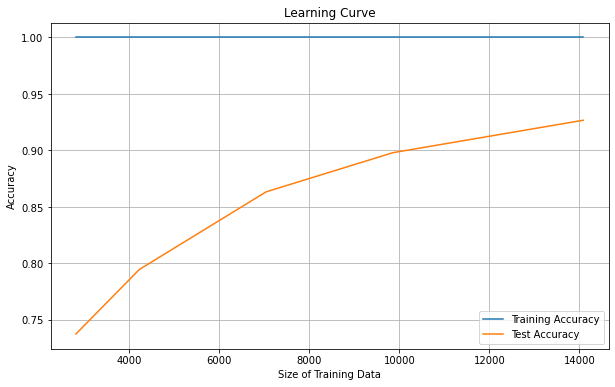

In [27]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# We'll store the train and test accuracies in these lists
train_accuracies = []
test_accuracies = []
training_sizes = []

# Define the proportions of training data to use
training_proportions = [0.2, 0.3, 0.5, 0.7, 1.0]

for proportion in training_proportions:
    # Calculate the number of training samples to use
    num_samples = int(proportion * len(X_train))
    training_sizes.append(num_samples)
    
    # Take the first 'num_samples' samples from the training data
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]
    
    # Initialize CatBoost classifier with the same parameters as the original model
    model = CatBoostClassifier(
        iterations=1000,
        learning_rate=0.1,
        depth=6,
        l2_leaf_reg=3,  # L2 regularization coefficient
        loss_function='MultiClass',  # Loss function for multi-class classification
        verbose=0  # Turn off output
    )
    
    # Train the model on the subset of the training data
    model.fit(X_train_subset, y_train_subset, eval_set=(X_test, y_test), verbose=False)
    
    # Make predictions and calculate accuracy for the train subset
    train_predictions = model.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)
    
    # Make predictions and calculate accuracy for the test set
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

# Plotting the learning curve
plt.figure(figsize=(10, 6))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Test Accuracy')
plt.title('Learning Curve')
plt.xlabel('Size of Training Data')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

<p><strong>Observations</strong></p>

<p>• <strong>Training accuracy</strong> is consistently at 100%, suggesting that the model has learned to perfectly classify all the training data.</p>

<p>• The <strong>testing accuracy</strong> rising gradually to 93% is a good sign, indicating that the model is improving its ability to generalize to new data. However, as training accuracy is at 100% and does not converge with the testing accuracy, this discrepancy can still be indicative of overfitting.</p>

<p>• In a <strong>well-fitting model</strong>, we would expect to see the training accuracy slightly above the testing accuracy, but both should be converging to a point. The fact that the training accuracy is perfect and the testing accuracy is lower (but still high) suggests that the model may be too complex and fitting the training data too closely.</p>

### To simplify the model, we employed Truncated SVD dimension reduction

#### <u>CatBoost with Truancated SVD_version1</u> high learning rate=0.1 with iterations=1000 

In [81]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pickle
import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=1000, 
    learning_rate=0.1, 
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',  # Specifying the loss function for multi-class classification
    early_stopping_rounds=50, # if the model's performance on the validation dataset doesn't get better for a 50 number 
                              # of rounds, training is stopped early to prevent overfitting.
    verbose=False
)

# Train the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = catboost_model.predict(X_test)

# Print the classification report
classification_rep = classification_report(y_test, predictions)
print("CatBoost Classification Report:")
print(classification_rep)

# Save the trained CatBoost model to a file
model_filename = 'Train_Test_catBosst_1000.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(catboost_model, model_file)

print(f"CatBoost model saved as {model_filename}")

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.96      0.97       396
           2       0.94      0.88      0.91       252
           3       0.89      0.89      0.89       402
           4       0.87      0.88      0.88       422
           5       0.97      0.96      0.96       456
           6       0.91      0.96      0.94       429
           7       0.94      0.92      0.93       291
           8       0.96      0.96      0.96       456
           9       0.97      0.96      0.96       417

    accuracy                           0.93      3521
   macro avg       0.93      0.93      0.93      3521
weighted avg       0.93      0.93      0.93      3521

CatBoost model saved as Train_Test_catBosst_1000.pkl
Total time taken: 787.2758128643036 seconds


<p><strong>Observations:</strong> Despite implementing Truncated SVD for dimension reduction, the accuracy of the model remains at 93%. This consistent high accuracy raises concerns about potential overfitting, as the model may still be fitting the training data too closely. Furthermore, it's noteworthy that when reducing dimensions on a dataset containing 17,000 instances, PCA with 80% variance retention required 3,000 seconds for processing, whereas Truncated SVD completed the task in only 800 seconds, demonstrating its computational efficiency.</p>

<p><strong>We will now reduce the number of iterations.</strong> . By doing so, we are effectively constraining the complexity of the final ensemble model. The model will halt the boosting process after 500 iterations, leading to a potentially simpler model as compared to when it was allowed to run for 1000 iterations.</p>

#### <u>CatBoost TruncatedSVD_version2 </u> with high learning rate=0.1, iteration=500

In [100]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pickle
import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# Initialize CatBoost classifier
catboost_model = CatBoostClassifier(
    iterations=500, 
    learning_rate=0.1, 
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',  # Specifying the loss function for multi-class classification
    early_stopping_rounds=50,
    verbose=False
)

# Train the model on the training data
catboost_model.fit(X_train, y_train)

# Make predictions on the test data
predictions = catboost_model.predict(X_test)

# Print the classification report
classification_rep = classification_report(y_test, predictions)
print("CatBoost Classification Report:")
print(classification_rep)

# Save the trained CatBoost model to a file
model_filename = 'Train_Test_catBosst_500.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(catboost_model, model_file)

print(f"CatBoost model saved as {model_filename}")

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       0.96      0.95      0.96       396
           2       0.90      0.86      0.88       252
           3       0.87      0.87      0.87       402
           4       0.82      0.81      0.81       422
           5       0.96      0.93      0.94       456
           6       0.86      0.92      0.89       429
           7       0.89      0.89      0.89       291
           8       0.92      0.93      0.92       456
           9       0.94      0.94      0.94       417

    accuracy                           0.90      3521
   macro avg       0.90      0.90      0.90      3521
weighted avg       0.90      0.90      0.90      3521

CatBoost model saved as Train_Test_catBosst_500.pkl
Total time taken: 299.20911169052124 seconds


<p><strong>Observations:</strong> Although accuracy dropped from 93% to 90%, it indicates that the model's complexity has been simplified. We will further investigate the impact of this change on the model's performance by examining the learning curve.</p>

<p>To further simplify the model, we conducted an experiment in which we increased the <strong>learning rate to 0.5 while maintaining the number of iterations at 500</strong>- Slower convergence: with a smaller learning rate, the model may require more iterations to converge to a solution.</p>

#### <u>CatBoost with Truancated SVD_version3</u> with learning rate =0.05 and iterations =500

In [78]:
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
import pickle
import time

start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# Initialize CatBoost classifier with 500 iterations
catboost_model_500 = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=4,
    l2_leaf_reg=5,
    loss_function='MultiClass',
    early_stopping_rounds=50,
    verbose=False
)

# Train the model on the training data
catboost_model_500.fit(X_train, y_train)

# Make predictions on the test data
predictions = catboost_model_500.predict(X_test)

# Print the classification report
classification_rep = classification_report(y_test, predictions)
print("CatBoost Classification Report:")
print(classification_rep)

# Save the trained CatBoost model to a file
model_filename = 'Train_Test_catBoost_500.pkl'
with open(model_filename, 'wb') as model_file:
    pickle.dump(catboost_model_500, model_file)

print(f"CatBoost model saved as {model_filename}")

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

CatBoost Classification Report:
              precision    recall  f1-score   support

           1       0.80      0.86      0.83       396
           2       0.78      0.77      0.78       252
           3       0.71      0.72      0.71       402
           4       0.64      0.60      0.62       422
           5       0.85      0.82      0.83       456
           6       0.74      0.71      0.73       429
           7       0.75      0.79      0.77       291
           8       0.72      0.76      0.74       456
           9       0.87      0.85      0.86       417

    accuracy                           0.76      3521
   macro avg       0.76      0.76      0.76      3521
weighted avg       0.76      0.76      0.76      3521

CatBoost model saved as Train_Test_catBoost_500.pkl
Total time taken: 119.832839012146 seconds


<p><strong>Observation:</strong> Decreasing the learning rate resulted in a drop in accuracy, but it contributed to a simpler model that helps mitigate overfitting. This inference may be supported by the patterns observed in the learning curve, which we will examine later.</p>

### Display Learning Curve: XBoost and CatBoost

#### Learning curve for XGBoost TruncatedSVD

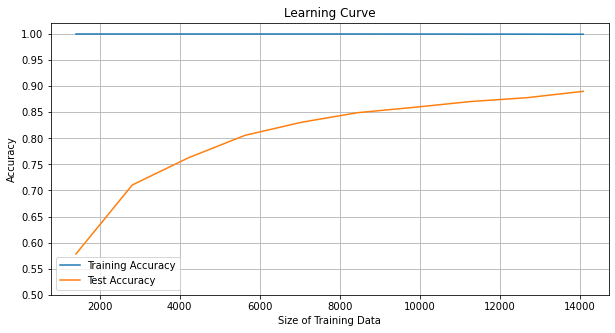

In [73]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

train_accuracies = []
test_accuracies = []
training_sizes = []

training_proportions = np.arange(0.1, 1.1, 0.1)  # From 10% to 100% in 10% increments

for proportion in training_proportions:
    num_samples = int(proportion * len(X_train))
    training_sizes.append(num_samples)
    
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]
    
    xgb_best_model = XGBClassifier(
        subsample=1, 
        n_estimators=110, 
        max_depth=4, 
        learning_rate=0.3, 
        colsample_bytree=1,  
        use_label_encoder=False,
        eval_metric='mlogloss'
    )
    
        
    try:
        xgb_best_model.fit(X_train_subset, y_train_subset, eval_set=[(X_test, y_test)], verbose=False)
    
        train_predictions = xgb_best_model.predict(X_train_subset)
        train_accuracy = accuracy_score(y_train_subset, train_predictions)
        train_accuracies.append(train_accuracy)
    
        test_predictions = xgb_best_model.predict(X_test)
        test_accuracy = accuracy_score(y_test, test_predictions)
        test_accuracies.append(test_accuracy)
    except Exception as e:
        print(f"Error at proportion {proportion}: {str(e)}")

plt.figure(figsize=(10, 5))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Test Accuracy')
plt.title('Learning Curve')
plt.xlabel('Size of Training Data')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.5, 1.05, 0.05))  # Setting y-ticks from 50% to 100% with 5% increments
plt.legend()
plt.grid(True)
plt.show()


<p><strong>Observations:</strong> The testing accuracy rising gradually to 89% is a good sign, indicating that the model is improving its ability to generalize to new data. However, as training accuracy is at 100% and does not converge with the testing accuracy, this discrepancy can still be indicative of overfitting.</p>

#### Learning curve for <u>CatBoost TruncatedSVD_version3 with low learning rate=0.05, iteration=500

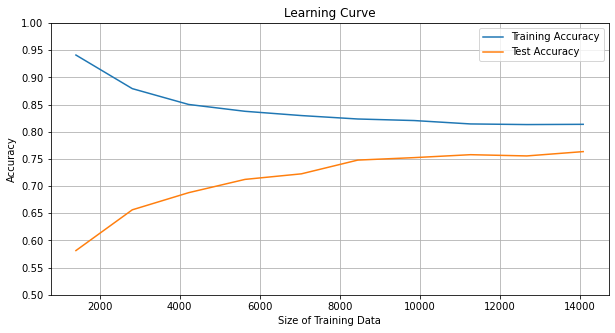

In [48]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

train_accuracies = []
test_accuracies = []
training_sizes = []

training_proportions = np.arange(0.1, 1.1, 0.1)  # From 10% to 100% in 10% increments

for proportion in training_proportions:
    num_samples = int(proportion * len(X_train))
    training_sizes.append(num_samples)
    
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]
    
    model = CatBoostClassifier(
        iterations=500,
        learning_rate=0.05,
        depth=4,
        l2_leaf_reg=5,
        loss_function='MultiClass',
        early_stopping_rounds=50,
        verbose=False
    )
    
    model.fit(X_train_subset, y_train_subset, eval_set=(X_test, y_test), verbose=False)
    
    train_predictions = model.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Test Accuracy')
plt.title('Learning Curve')
plt.xlabel('Size of Training Data')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.5, 1.05, 0.05))  # Setting y-ticks from 50% to 100% with 5% increments
plt.legend()
plt.grid(True)
plt.show()

<p><strong>Observations:</strong> Although it exhibits characteristics of a <strong>good fit model</strong>, where we observe the training accuracy slightly above the testing accuracy, converging as the training set size increases, we cannot consider it satisfactory due to the relatively low accuracy.</p>

#### Learning curve with TruncatedSVD with <u>CatBoost with TruncatedSVD_v2</u> with high learning rate=0.1, iteration=500

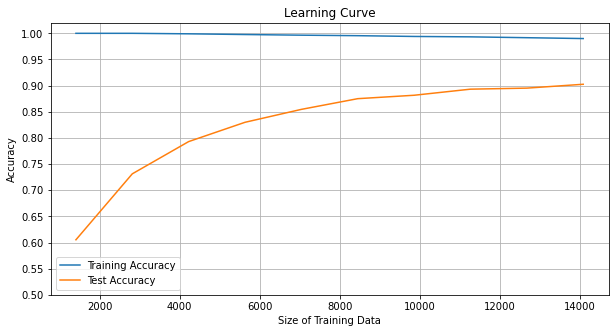

In [103]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

train_accuracies = []
test_accuracies = []
training_sizes = []

training_proportions = np.arange(0.1, 1.1, 0.1)  # From 10% to 100% in 10% increments

for proportion in training_proportions:
    num_samples = int(proportion * len(X_train))
    training_sizes.append(num_samples)
    
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]
    
    model = CatBoostClassifier(
        iterations=500, 
        learning_rate=0.1, 
        depth=6,
        l2_leaf_reg=3,
        loss_function='MultiClass',  # Specifying the loss function for multi-class classification
        early_stopping_rounds=50,
        verbose=False
    )
    
    model.fit(X_train_subset, y_train_subset, eval_set=(X_test, y_test), verbose=False)
    
    train_predictions = model.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Test Accuracy')
plt.title('Learning Curve')
plt.xlabel('Size of Training Data')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.5, 1.05, 0.05))  # Setting y-ticks from 50% to 100% with 5% increments
plt.legend()
plt.grid(True)
plt.show()

<p><strong>Observations:</strong></p>
<p>The learning curve reveals insightful trends about the model's performance as more data is introduced during training. Initially, the model displays a perfect training accuracy of 100%. This could be indicative of the model memorizing the training data, a phenomenon commonly known as overfitting.</p>
<p>As the size of the training data increases, the training accuracy begins to decline slightly, falling to 99% at 10,000 data points and further dipping to 98% with 17,000 data points. This gradual decrease in training accuracy is actually a <strong>positive sign</strong>. It suggests that the model is starting to generalize better rather than just memorizing the training data. The slight reduction in training accuracy implies that the model is learning to accommodate a wider variety of data patterns, which is <strong>desirable in a well-generalizing model</strong>.</p>
<p>Conversely, the testing accuracy, which reflects the model's ability to apply what it has learned to new, unseen data, increases to 91% at 17,000 data points. This increase in testing accuracy as more data is provided suggests that the model is benefiting from the additional information and becoming more adept at predicting unseen samples.</p>
<p>In a well-functioning learning curve, we expect to see the training accuracy decrease slightly and the testing accuracy increase as more data is added. Ideally, both curves should converge to a point where increasing the amount of training data does not significantly change the accuracy. This model seems to be following this trend, which <strong>indicates a good fit</strong>: the model is neither overfitting (where the training accuracy is unrealistically high compared to the testing accuracy) nor underfitting (where the model fails to learn from the training data and performs poorly on both training and testing data).</p>
<p>However, the fact that there is still a noticeable gap between training and testing accuracy at 17,000 data points suggests that there might be room for further improvement. We may consider experimenting by adding more data if possible.</p>

#### Learning curve with TruncatedSVD with <u>CatBoost with Truancated SVD_version1</u> with high learning rate=0.1, iteration=1000

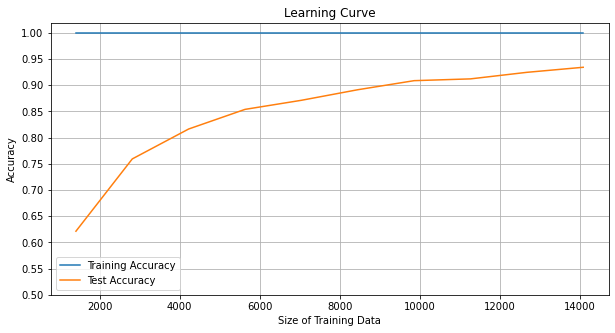

In [85]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

train_accuracies = []
test_accuracies = []
training_sizes = []

training_proportions = np.arange(0.1, 1.1, 0.1)  # From 10% to 100% in 10% increments

for proportion in training_proportions:
    num_samples = int(proportion * len(X_train))
    training_sizes.append(num_samples)
    
    X_train_subset = X_train[:num_samples]
    y_train_subset = y_train[:num_samples]
    
    model = CatBoostClassifier(
        iterations=1000, 
        learning_rate=0.1, 
        depth=6,
        l2_leaf_reg=3,
        loss_function='MultiClass',  # Specifying the loss function for multi-class classification
        early_stopping_rounds=50,
        verbose=False
    )
    
    model.fit(X_train_subset, y_train_subset, eval_set=(X_test, y_test), verbose=False)
    
    train_predictions = model.predict(X_train_subset)
    train_accuracy = accuracy_score(y_train_subset, train_predictions)
    train_accuracies.append(train_accuracy)
    
    test_predictions = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, test_predictions)
    test_accuracies.append(test_accuracy)

plt.figure(figsize=(10, 5))
plt.plot(training_sizes, train_accuracies, label='Training Accuracy')
plt.plot(training_sizes, test_accuracies, label='Test Accuracy')
plt.title('Learning Curve')
plt.xlabel('Size of Training Data')
plt.ylabel('Accuracy')
plt.yticks(np.arange(0.5, 1.05, 0.05))  # Setting y-ticks from 50% to 100% with 5% increments
plt.legend()
plt.grid(True)
plt.show()

<p><strong>Observations:</strong> The testing accuracy rising gradually to 93% is a good sign, indicating that the model is improving its ability to generalize to new data. However, as training accuracy is at 100% and does not converge with the testing accuracy, this discrepancy can still be indicative of overfitting.</p>

### Catboost best Model:
Based on the analysis of CatBoost models, we have identified the best-performing model to be <u>CatBoost with Truncated SVD_version2</u> This model, with a high learning rate of 0.1 and 500 iterations, achieved an precision of 90% and also showing good fit trend as per learning curve.

### Confidence threshold in CatBoost

<p>Up to this point, CatBoost with a high learning rate of 0.1 and 500 iterations has produced a good model, achieving a precision of 91%. Now, let's delve into another valuable aspect of this models: the use of a confidence threshold.</p>
<p>Here's how the confidence_threshold works in CatBoost:</p>
<ul>
    <li><strong>Probability Prediction:</strong> After training a CatBoostClassifier model, we can use it to predict the probabilities of each class for a given input data point. These probabilities indicate how confident the model is about the data point belonging to each class.</li>
    <li><strong>Setting the Threshold:</strong> We can set a confidence_threshold value between 0 and 1.</li>
    <li><strong>Classification Decision:</strong> When making predictions, if the highest probability for a data point is less than the confidence_threshold, the prediction is flagged as unreliable.</li>
    <li><strong>Manual Review:</strong> Data points for which the highest predicted probability is below the confidence_threshold are typically flagged for manual review. In practice, a human reviewer can assess these cases and make informed decisions about their classification. For example, in a legal document categorization application, the confidence_threshold can be used to identify documents that require further scrutiny.</li>
</ul>

In [80]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
import numpy as np


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42, stratify=y)

# Initialize and train the CatBoost classifier
model = CatBoostClassifier(
    iterations=500, 
    learning_rate=0.1, 
    depth=6,
    l2_leaf_reg=3,
    loss_function='MultiClass',  # Specifying the loss function for multi-class classification
    early_stopping_rounds=50,
    verbose=False
)
model.fit(X_train, y_train)

# Define a confidence threshold for manual review
confidence_threshold = 0.7

# Predict class probabilities and flag items for review
probabilities = model.predict_proba(X_test)
max_probs = np.max(probabilities, axis=1)
flags = max_probs < confidence_threshold

# Create a list to store flagged items and their probabilities
flagged_items = []

for i, (flag, prob) in enumerate(zip(flags, max_probs)):
    if flag:
        flagged_items.append((i, prob))

# Sort flagged items by probability (from lowest to highest)
flagged_items.sort(key=lambda x: x[1])

# Output the flagged items
print(f"\nTotal flagged items out of 3521 items: {len(flagged_items)}")

print("Flagged items for manual review:")
for item in flagged_items:
    print(f"Item {item[0]} flagged for manual review. Probability: {item[1]:.2f}")




Total flagged items out of 3521 items: 805
Flagged items for manual review:
Item 975 flagged for manual review. Probability: 0.19
Item 1255 flagged for manual review. Probability: 0.21
Item 1504 flagged for manual review. Probability: 0.21
Item 2321 flagged for manual review. Probability: 0.22
Item 1177 flagged for manual review. Probability: 0.23
Item 1500 flagged for manual review. Probability: 0.23
Item 1047 flagged for manual review. Probability: 0.25
Item 3498 flagged for manual review. Probability: 0.25
Item 1079 flagged for manual review. Probability: 0.26
Item 2589 flagged for manual review. Probability: 0.26
Item 1226 flagged for manual review. Probability: 0.26
Item 114 flagged for manual review. Probability: 0.26
Item 1353 flagged for manual review. Probability: 0.26
Item 1723 flagged for manual review. Probability: 0.26
Item 1267 flagged for manual review. Probability: 0.27
Item 1994 flagged for manual review. Probability: 0.27
Item 1200 flagged for manual review. Probabil

Item 205 flagged for manual review. Probability: 0.56
Item 3006 flagged for manual review. Probability: 0.56
Item 2306 flagged for manual review. Probability: 0.56
Item 1372 flagged for manual review. Probability: 0.56
Item 725 flagged for manual review. Probability: 0.56
Item 2693 flagged for manual review. Probability: 0.56
Item 1508 flagged for manual review. Probability: 0.56
Item 3402 flagged for manual review. Probability: 0.56
Item 475 flagged for manual review. Probability: 0.56
Item 216 flagged for manual review. Probability: 0.56
Item 1036 flagged for manual review. Probability: 0.57
Item 2622 flagged for manual review. Probability: 0.57
Item 2602 flagged for manual review. Probability: 0.57
Item 2009 flagged for manual review. Probability: 0.57
Item 2654 flagged for manual review. Probability: 0.57
Item 273 flagged for manual review. Probability: 0.57
Item 2299 flagged for manual review. Probability: 0.57
Item 2313 flagged for manual review. Probability: 0.57
Item 269 flagge

## Bagging
<p>While achieving a high accuracy with CatBoost is positive, exploring other techniques like Bagging Classifier is a good practice in machine learning to ensure that we have considered various approaches. 
    
A bagging classifier combines multiple classifiers to make better predictions. It creates subsets of the training data, trains individual classifiers on each subset, and then combines their predictions for a more accurate final result. We will construct a Bagging Classifier model employing DecisionTreeClassifier as the base estimator. It performs hyperparameter tuning using a randomized search strategy (RandomizedSearchCV). The coarse_search_bagging variable represents the hyperparameter tuning process.</p>

### Coarse search
<p>The <code>coarse_param_grid_bagging</code> defines a grid of hyperparameters that will be explored during the hyperparameter tuning process for the Bagging Classifier:</p>
<ul>
    <li><code>'n_estimators'</code>: This hyperparameter determines the number of base estimators (Decision Trees in this case) that will be used in the Bagging Classifier. It specifies different values to test, including 10, 50, and 100 base estimators.</li>
    <li><code>'max_samples'</code>: This hyperparameter controls the maximum number of samples to draw from the training data when constructing each subset for training individual base estimators. It can take values of 0.5, 0.7, and 1.0, representing the fraction of the training data to be used.</li>
    <li><code>'max_features'</code>: Similar to <code>'max_samples'</code>, this hyperparameter controls the maximum number of features (attributes) to consider when fitting each individual base estimator. Again, it can take values of 0.5, 0.7, and 1.0, representing the fraction of features to be considered.</li>
    <li><code>'base_estimator__max_depth'</code>: This hyperparameter is specific to the base estimator used within the Bagging Classifier, which is a DecisionTreeClassifier in this case. It controls the maximum depth of the decision trees. The values specified are 5, 10, and None, where None means that the decision trees are allowed to expand until they reach their purest form (potentially leading to overfitting).</li>
</ul>
<p>These hyperparameters collectively define the configuration space that will be explored to find the optimal settings for the Bagging Classifier. Note that, we used Truncated SVD for dimension reduction.</p>

In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

import time
start_time = time.time()

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=42,stratify=y)

# Coarse Hyperparameter Grid
coarse_param_grid_bagging = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'max_features': [0.5, 0.7, 1.0],
    'base_estimator__max_depth': [5, 10, None]
}

# Initialize Bagging Classifier with a base estimator
base_estimator = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=base_estimator)

# Randomized Search
coarse_search_bagging = RandomizedSearchCV(
    bagging_clf, coarse_param_grid_bagging, n_iter=10,
    scoring='accuracy', cv=3, n_jobs=-1, random_state=42, verbose=1
)
coarse_search_bagging.fit(X_train, y_train)

# Best Parameters from Coarse Search
print("Best Parameters from Bagging Coarse Search:", coarse_search_bagging.best_params_)

# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\sheik\anaconda3\lib\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Best Parameters from Bagging Coarse Search: {'n_estimators': 50, 'max_samples': 1.0, 'max_features': 0.7, 'base_estimator__max_depth': None}
Total time taken: 937.125803232193 seconds


#### We proceeded by utilizing the best parameters obtained from the Bagging Coarse Search

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

import time
start_time = time.time()

# Initialize the Decision Tree Classifier for bagging
estimator = DecisionTreeClassifier(max_depth=None)  # None indicates no maximum depth

# Initialize the Bagging Classifier with the best parameters and updated parameter name
bagging_best = BaggingClassifier(
    estimator=estimator,
    n_estimators=50,                # Best number of estimators
    max_samples=1.0,                # Best max_samples
    max_features=0.7,               # Best max_features
    random_state=42                 # For reproducibility
)

# Train the model on the training data
bagging_best.fit(X_train, y_train)

# Make predictions on the test data
predictions = bagging_best.predict(X_test)

# Print the classification report
print("Classification Report:")
print(classification_report(y_test, predictions))


# End the timer
end_time = time.time()
print(f"Total time taken: {end_time - start_time} seconds")

Classification Report:
              precision    recall  f1-score   support

           1       0.78      0.92      0.84       144
           2       0.84      0.89      0.86        72
           3       0.76      0.82      0.79       144
           4       0.79      0.62      0.70       128
           5       0.86      0.82      0.84       144
           6       0.81      0.66      0.73       144
           7       0.83      0.74      0.78        72
           8       0.87      0.92      0.89       144
           9       0.77      0.88      0.82       144

    accuracy                           0.81      1136
   macro avg       0.81      0.81      0.81      1136
weighted avg       0.81      0.81      0.81      1136

Total time taken: 250.9223346710205 seconds


<P><strong>Observations:</strong>The Bagging Classifier yielded an accuracy of 81%, which falls below our expectations. As a result, we have chosen to discontinue the use of this classifier.</p>

## Model Evaluation

#### PCA with  95% (~1770 features from 10,000)
| Model Description         | Average Precision | Average Recall | Average F1-Score | Time taken to run |
|---------------------------|-------------------|----------------|-------------------|--------------------|
| LogisticRegression        | 0.60              | 0.60           | 0.60              | 40 seconds         |
| Randomized Search SVM     | 0.70              | 0.65           | 0.66              | 2208 seconds       |
| <span style="background-color: orange;">Grid Search SVM           | <span style="background-color: orange;">0.68              | 0.66           | 0.67              | <span style="background-color: orange;">11402 seconds      |
| Refined Grid Search SVM   | 0.68              | 0.66           | 0.66              | 859 seconds        |

#### PCA with 80% (~700 features from 10,000)
| Model Description         | Average Precision | Average Recall | Average F1-Score | Time to run |
|---------------------------|-------------------|----------------|-------------------|--------------|
| Randomized Search SVM     | 0.79              | 0.79           | 0.79              | 571 seconds   |
| Grid Search SVM           | 0.81              | 0.79           | 0.79              | 2943 seconds  |
| Refined Grid Search SVM   | 0.81              | 0.79           | 0.79              | 271 seconds   |
| <span style="background-color: lightblue;">CatBoost with PCA 80%     | <span style="background-color: lightblue;">0.93              | 0.92           | <span style="background-color: lightblue;">0.92              | <span style="background-color: lightblue;">784 seconds   |
| XGBoost with PCA 80%      | 0.86              | 0.86           | 0.86              | 189 seconds   |

#### Truncated SVD (400 features from 10,000)
| Model Description          | Average Precision | Average Recall | Average F1-Score | Time taken to run |
|----------------------------|-------------------|----------------|-------------------|--------------------|
| XGBoost with Truncated SVD | 0.89              | 0.89           | 0.89              | 437 seconds         |
| <span style="background-color: lightblue;">CatBoost with Truncated SVD_v1 | <span style="background-color: lightblue;">0.93           | 0.93           | <span style="background-color: lightblue;">0.93              | <span style="background-color: lightblue;">787 seconds         |
| <span style="background-color: yellow;">CatBoost with Truncated SVD_v2    | <span style="background-color: yellow;">0.90              | 0.90           | 0.90              | <span style="background-color: yellow;">300 seconds         |</span>        |
| CatBoost with Truncated SVD_v3 | 0.76           | 0.76           | 0.76              | 120 seconds         |
| Bagging Classifier         | 0.81              | 0.81           | 0.81              | 250 seconds         |


<p>In the quest for the most effective model for our signature verification system, we closely analyzed several contenders. While <strong>CatBoost with Truncated SVD_v1</strong> achieved the highest precision of 93%, further inspection of the learning curves hinted at potential overfitting, which could hinder its practical application.</p>
<p>After an extensive review of model performances and their corresponding learning curves, the model that emerged as the most promising was <strong>CatBoost with Truncated SVD_v2</strong>. This particular model, with a robust learning rate of 0.1 and an iteration count of 500, managed to secure a notable <strong>precision score of 90%</strong>.</p>
<p>Equally important to its precision was the model's efficiency in training; it took a feasible 5-7 minutes to train on a dataset size of 17,000. This blend of exceptional accuracy, a demonstrable avoidance of overfitting, and a practical training timeframe solidifies <strong>CatBoost with Truncated SVD_v2</strong> as the superior choice for our signature verification task.</p>

## Further Improvement:

We have made good progress in configuring our CatBoost model, but there are still several avenues to explore for further improvement. From the learning curve, we can see a noticeable gap between training (98%) and testing accuracy (90%) at 17,000 data points. Here are some recommendations:

- **Data Augmentation:** We can apply additional data augmentation techniques to generate more training samples. This can help the model generalize better.

- **Fine-Tune Learning Rate:** The learning rate controls the step size during training. Experiment with different learning rates to find the one that works best for our dataset. We can try values like 0.01, 0.05, 0.1, and 0.2.

- **Depth of Trees:** The depth of the trees in our ensemble can impact model complexity. Deeper trees can capture more complex patterns but may lead to overfitting. Experiment with different depths to find the right balance.

- **Feature Engineering:** Analyze our features and consider creating new features or engineering existing ones. Feature engineering can significantly impact model performance. Domain-specific features can be particularly valuable.

- **Cross-Validation:** Implement k-fold cross-validation to assess our model's performance more robustly. This can help us detect overfitting and provide a better estimate of generalization performance.

- **Ensemble Methods:** Consider building an ensemble of multiple CatBoost models with different hyperparameters. We can combine their predictions to improve overall performance. We can also combine CatBoost and XGBoost into an ensemble.

- **Grid Search or Random Search:** Use grid search or random search techniques to systematically explore hyperparameter combinations. This can be computationally expensive but may lead to better hyperparameter choices.

- **Regularization Techniques:** Experiment with other regularization techniques such as dropout or early stopping with different criteria to prevent overfitting.

- **Evaluate Feature Importance:** Use CatBoost's feature importance functionality to identify the most informative features. We can then focus on these features or consider eliminating less important ones.


### Final Model

<p>Our ultimate model is the CatBoost with Truancated SVD_v2, which has been configured with the following parameters:</p>
<ul>
  <li>Iterations: 500 iterations</li>
  <li>Learning Rate: 0.1</li>
  <li>Depth: 6</li>
  <li>L2 Leaf Regularization: 3</li>
  <li>Loss Function: Specified as 'MultiClass' to handle multi-class classification</li>
  <li>Early Stopping Rounds: 50</li>
</ul>
<p>These settings define the key characteristics of our final CatBoostClassifier model.</p>

### Train Ful model with entire Dataset: catboost_full_model
We will now train the full model using the entire dataset and save it as a .pckl file.

In [108]:
from catboost import CatBoostClassifier
import pickle

# Initialize CatBoost classifier
catboost_full_model = CatBoostClassifier(
        iterations=500, 
        learning_rate=0.1, 
        depth=6,
        l2_leaf_reg=3,
        loss_function='MultiClass',  # Specifying the loss function for multi-class classification
        early_stopping_rounds=50,
        verbose=False
)


# Train the model on the full dataset
catboost_full_model.fit(X_pca, y)

# Save the fully trained CatBoost model to a file
model_filename = 'catboost_full_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(catboost_full_model, file)

### Final Deployment: Prepare for Testing
To test the model on real unseen data, we need to implement all the necessary functions to read the images, preprocess them into the desired format, and then utilize the model for making predictions.


In [1]:
import os
import numpy as np
from PIL import Image, ImageFilter
import pickle

# Function to load, sharpen, and process an image
def load_and_process_image(image_path):
    # Load the image
    img = Image.open(image_path).convert('L')  # Convert to grayscale

    # Apply the filter for sharpening
    img = img.filter(ImageFilter.CONTOUR)


    # Check if image is already 100x100
    if img.size != (100, 100):
        img = img.resize((100, 100))  # Resize to 100x100 only if necessary
    
    img_array = np.array(img).flatten()  # Flatten the image
    return img_array

# Function to make a prediction
def predict_signature(image_path, model, scaler, pca):
    # Process the image
    img_array = load_and_process_image(image_path)
    
    # Standardize and apply PCA transformation
    img_array_scaled = scaler.transform([img_array])
    img_array_pca = pca.transform(img_array_scaled)

    # Make a prediction
    prediction = model.predict(img_array_pca)
    return prediction[0] # Add 1 to adjust the class label

# Load the trained model, PCA, and scaler
with open('catboost_full_model.pkl', 'rb') as file: #catboost_full_model
    model = pickle.load(file)
with open('scaler.pkl', 'rb') as file:
    scaler = pickle.load(file)
with open('tsvd.pkl', 'rb') as file:
    pca = pickle.load(file)

# Directory containing the test images
test_image_directory = './Test/'

# Predict on new images in the specified directory
for filename in os.listdir(test_image_directory):
    if filename.lower().endswith(('.jpg', '.jpeg')):
        image_path = os.path.join(test_image_directory, filename)
        prediction = predict_signature(image_path, model, scaler, pca)
        print(f"{filename}: Predicted Class - {prediction}")

print("Image processing and prediction completed.")


Image_1.jpg: Predicted Class - [6]
Image_10.jpg: Predicted Class - [6]
Image_2.jpg: Predicted Class - [3]
Image_3.jpg: Predicted Class - [6]
Image_4.jpg: Predicted Class - [3]
Image_5.jpg: Predicted Class - [3]
Image_6.jpg: Predicted Class - [5]
Image_7.jpg: Predicted Class - [5]
Image_8.jpg: Predicted Class - [9]
Image_9.jpg: Predicted Class - [6]
Image processing and prediction completed.
